# Setup

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import os
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
from sklearn.metrics import precision_score,recall_score,accuracy_score

df = pd.read_csv("garments_worker_productivity.csv", 
                 parse_dates=['date'])

print(df.shape)
df.head()

(1197, 15)


date   quarter  department       day  team  targeted_productivity  \
0 2015-01-01  Quarter1      sweing  Thursday     8                   0.80   
1 2015-01-01  Quarter1  finishing   Thursday     1                   0.75   
2 2015-01-01  Quarter1      sweing  Thursday    11                   0.80   
3 2015-01-01  Quarter1      sweing  Thursday    12                   0.80   
4 2015-01-01  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

In [41]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

quarter : A portion of the month. A month was divided into four quarters

team : Associated team number with the instance

no_of_workers : Number of workers in each team

no_of_style_change : Number of changes in the style of a particular product

targeted_productivity : Targeted productivity set by the Authority for each 
team for each day.

smv : Standard Minute Value, it is the allocated time for a task

wip : Work in progress. Includes the number of unfinished items for products

overtime : Represents the amount of overtime by each team in minutes

incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.

idle_time : The amount of time when the production was interrupted due to several reasons

idle_men : The number of workers who were idle due to production interruption

actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

**Categorical**

date: Contains duplicates. Range from 2015-01-01 to 2015-03-11, which is 59 days

quarter: Has 5 values. Quarter 1-5

department: Has 2 values. ‘sweing’ and ‘finishing’

day: Has 6 values. Friday does not appear

team: Has 12 values, for 12 teams


**Numerical**

targeted_productivity: Has 9 unique values - range is 0.07 - 0.8

smv:	Values range from 2.9 to 54.56

wip: Values range from 7 to 23122.

over_time: Values range from 0 to 25920. Extreme outliers. The majority are 0, 960, 1440

incentive: Values range from 0 to 3600. Extreme outliers. The majority is 0

idle_time: Values range from 0 to 300. Extreme outliers. The majority is 0

idle_men: Values range from 0 to 45. The majority is 0

no_of_style_change: Only has 3 values - 0,1,2. The majority is 0

no_of_workers: Ranges from 2 to 89. The majority is 8. There are some numbers that include decimals i.e. 51.5. 

actual_productivity: Values range from 0.2337 to 1.1204

In [3]:
# Check for duplicate records.
print(df.duplicated().sum())

0


In [4]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

# Categorical Features

In [42]:
category = df.select_dtypes(include='object')
for c in category.columns:
    print(f"{c}")
    print(category[c].unique())
    print()
category.loc[:,'department'] = category.loc[:,'department'].str.strip()
print(category.describe())

quarter
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']

department
['sweing' 'finishing ' 'finishing']

day
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']

         quarter department        day
count       1197       1197       1197
unique         5          2          6
top     Quarter1     sweing  Wednesday
freq         360        691        208


## Quarter
quarter : A portion of the month. A month was divided into four quarters

Has 5 values. Quarter 1-5

Quarter5 is only dates 1/29 and 1/31

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64


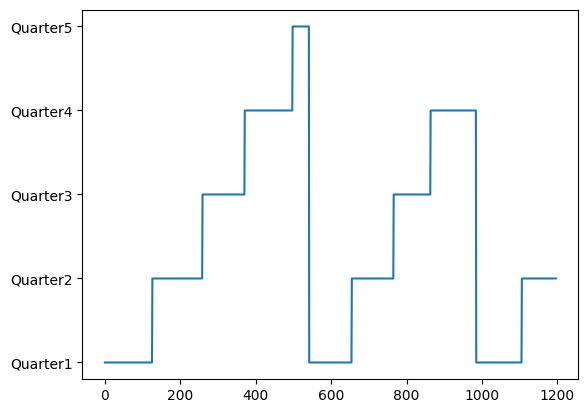

In [8]:
print(df['quarter'].value_counts())
plt.plot(df.index,df.quarter)
plt.show()

<Axes: ylabel='quarter'>

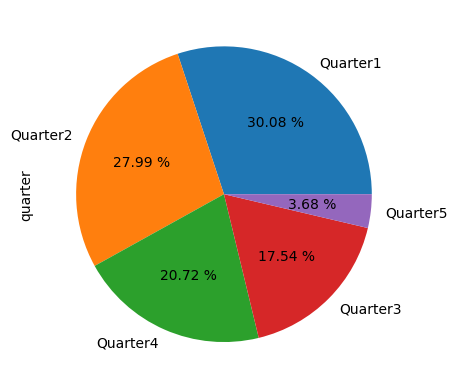

In [52]:
df.quarter.value_counts().plot.pie(autopct='%.2f %%')

In [9]:
df_q5=df[df['quarter']=='Quarter5']
print(df_q5.shape)
print(df_q5.index)
df_q5

(44, 15)
Int64Index([498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510,
            511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523,
            524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536,
            537, 538, 539, 540, 541],
           dtype='int64')


date   quarter  department       day  team  targeted_productivity  \
498 2015-01-29  Quarter5      sweing  Thursday     2                   0.80   
499 2015-01-29  Quarter5  finishing   Thursday     4                   0.80   
500 2015-01-29  Quarter5      sweing  Thursday     3                   0.80   
501 2015-01-29  Quarter5      sweing  Thursday     4                   0.80   
502 2015-01-29  Quarter5      sweing  Thursday    10                   0.80   
503 2015-01-29  Quarter5  finishing   Thursday     6                   0.50   
504 2015-01-29  Quarter5  finishing   Thursday     8                   0.65   
505 2015-01-29  Quarter5  finishing   Thursday    11                   0.60   
506 2015-01-29  Quarter5  finishing   Thursday    10                   0.80   
507 2015-01-29  Quarter5  finishing   Thursday     1                   0.75   
508 2015-01-29  Quarter5      sweing  Thursday     1                   0.75   
509 2015-01-29  Quarter5      sweing  Thursday     9                   0.70   
510 2015-01-29  Quarter5      sweing  Thursday     5                   0.65   
511 2015-01-29  Quarter5  finishing   Thursday     2                   0.80   
512 2015-01-29  Quarter5      sweing  Thursday    12                   0.75   
513 2015-01-29  Quarter5  finishing   Thursday    12                   0.75   
514 2015-01-29  Quarter5      sweing  Thursday    11                   0.60   
515 2015-01-29  Quarter5      sweing  Thursday     6                   0.50   
516 2015-01-29  Quarter5  finishing   Thursday     3                   0.80   
517 2015-01-29  Quarter5      sweing  Thursday     7                   0.65   
518 2015-01-31  Quarter5      sweing  Saturday     3                   0.80   
519 2015-01-31  Quarter5      sweing  Saturday     2                   0.80   
520 2015-01-31  Quarter5  finishing   Saturday     2                   0.80   
521 2015-01-31  Quarter5  finishing   Saturday     3                   0.80   
522 2015-01-31  Quarter5  finishing   Saturday     4                   0.80   
523 2015-01-31  Quarter5  finishing   Saturday    10                   0.80   
524 2015-01-31  Quarter5  finishing   Saturday     1                   0.75   
525 2015-01-31  Quarter5  finishing   Saturday     9                   0.75   
526 2015-01-31  Quarter5  finishing   Saturday    12                   0.75   
527 2015-01-31  Quarter5  finishing   Saturday     5                   0.70   
528 2015-01-31  Quarter5  finishing   Saturday     7                   0.70   
529 2015-01-31  Quarter5  finishing   Saturday     8                   0.65   
530 2015-01-31  Quarter5  finishing   Saturday    11                   0.65   
531 2015-01-31  Quarter5  finishing   Saturday     6                   0.60   
532 2015-01-31  Quarter5      sweing  Saturday    10                   0.80   
533 2015-01-31  Quarter5      sweing  Saturday     4                   0.80   
534 2015-01-31  Quarter5      sweing  Saturday     9                   0.75   
535 2015-01-31  Quarter5      sweing  Saturday     1                   0.75   
536 2015-01-31  Quarter5      sweing  Saturday    12                   0.75   
537 2015-01-31  Quarter5      sweing  Saturday     5                   0.70   
538 2015-01-31  Quarter5      sweing  Saturday    11                   0.65   
539 2015-01-31  Quarter5      sweing  Saturday     6                   0.60   
540 2015-01-31  Quarter5      sweing  Saturday     7                   0.70   
541 2015-01-31  Quarter5      sweing  Saturday     8                   0.50   

       smv     wip  over_time  incentive  idle_time  idle_men  \
498  22.52  1416.0       6840        113        0.0         0   
499   4.30     NaN       1200          0        0.0         0   
500  22.52  1287.0       6840        100        0.0         0   
501  22.52  1444.0       6900         88        0.0         0   
502  22.52  1088.0       6720         88        0.0         0   
503   2.90     NaN       1200          0        0.0         0   

## Department

Associated department with the instance

Has 3 values. ‘sweing’ and ‘finishing’ and 'finishing '

Typos in sewing and finishing

In [12]:
df.department.value_counts() 

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

<Axes: ylabel='department'>

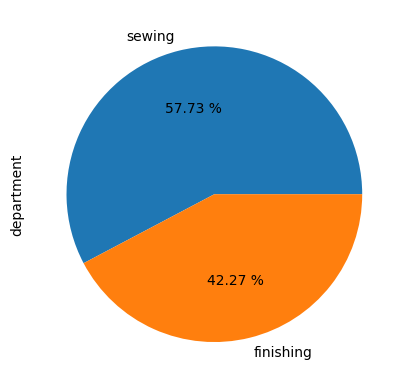

In [51]:
df.department.value_counts().plot.pie(autopct='%.2f %%')

In [47]:
# Fix typos
df=df.replace(['finishing '], ['finishing'])  
df=df.replace(['sweing'], ['sewing'])  
df.department.value_counts()

sewing       691
finishing    506
Name: department, dtype: int64

## Day

Day of the Week

Has 6 values Monday, Tuesday, Wednesday, Thursday, Saturday, Sunday

Friday does not appear. Possibly closed on fridays

In [16]:
df.day.value_counts() 

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

<Axes: ylabel='day'>

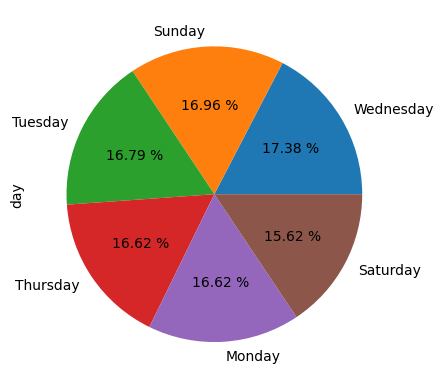

In [53]:
df.day.value_counts().plot.pie(autopct='%.2f %%')

# Numerical Features

              team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.00

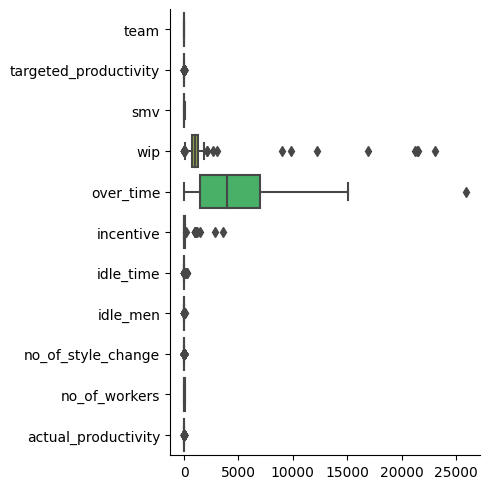

In [17]:
numerical = df.select_dtypes(exclude='object')
df = pd.concat([category, numerical], axis=1)
print(numerical.describe())
sns.catplot(kind='box', data=numerical, orient='h');

## Team

Associated team number with the instance

Has 12 values, for 12 teams

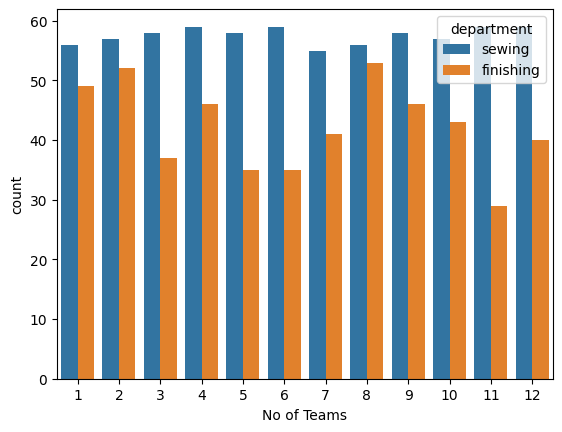

In [87]:
ax = sns.countplot(x = 'team', data = df, hue='department')
plt.xlabel('No of Teams')
plt.show()

<Axes: ylabel='team'>

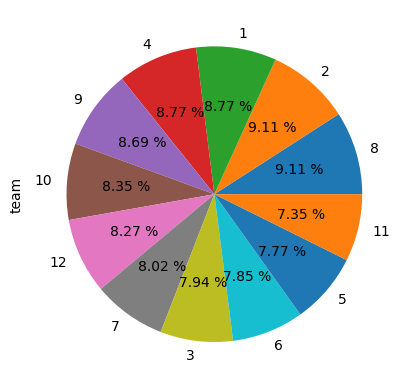

In [91]:
df.team.value_counts().plot.pie(autopct='%.2f %%')

## SMV

Standard Minute Value, it is the allocated time for a task

Values range from 2.9 to 54.56

<Axes: ylabel='Frequency'>

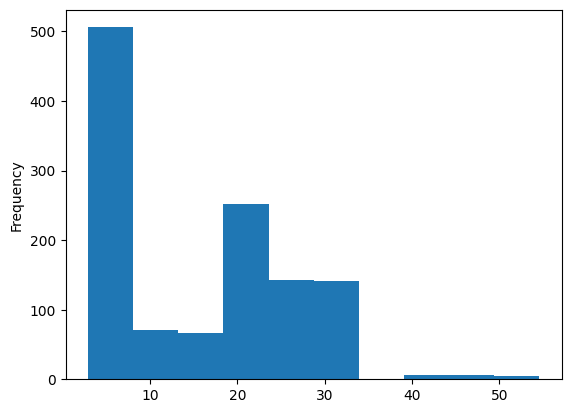

In [55]:
df.smv.plot.hist()

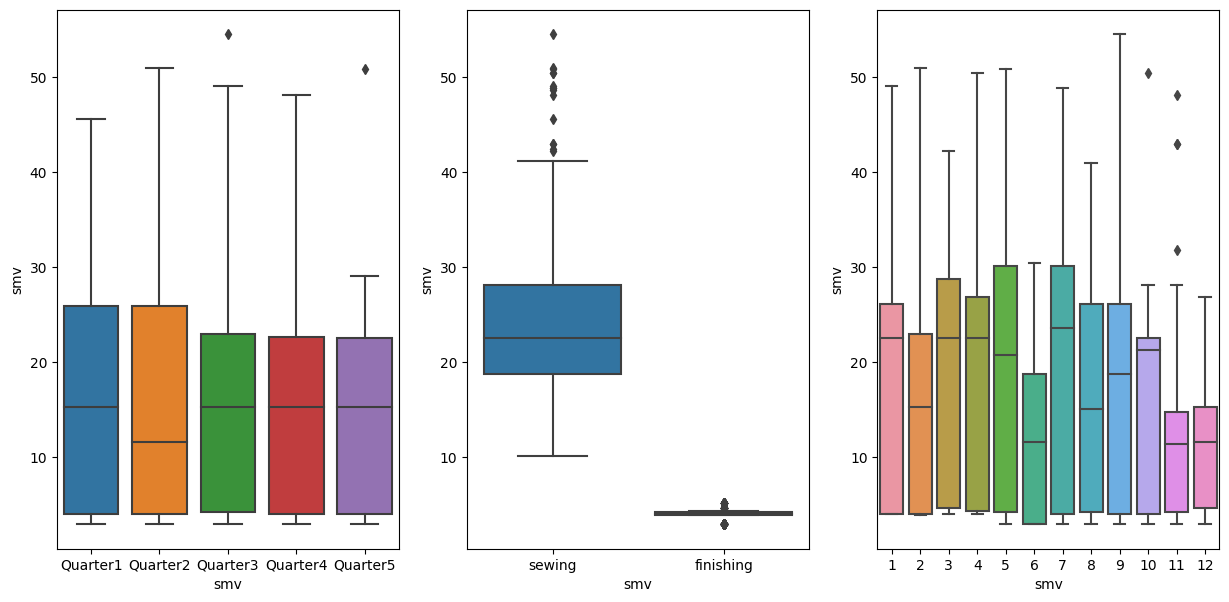

In [83]:
plt.figure(figsize=(15, 7))
palette='gist_rainbow'

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='quarter',y='smv')
plt.xlabel('smv')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='department',y='smv')
plt.xlabel('smv')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='team',y='smv')
plt.xlabel('smv')

plt.show()

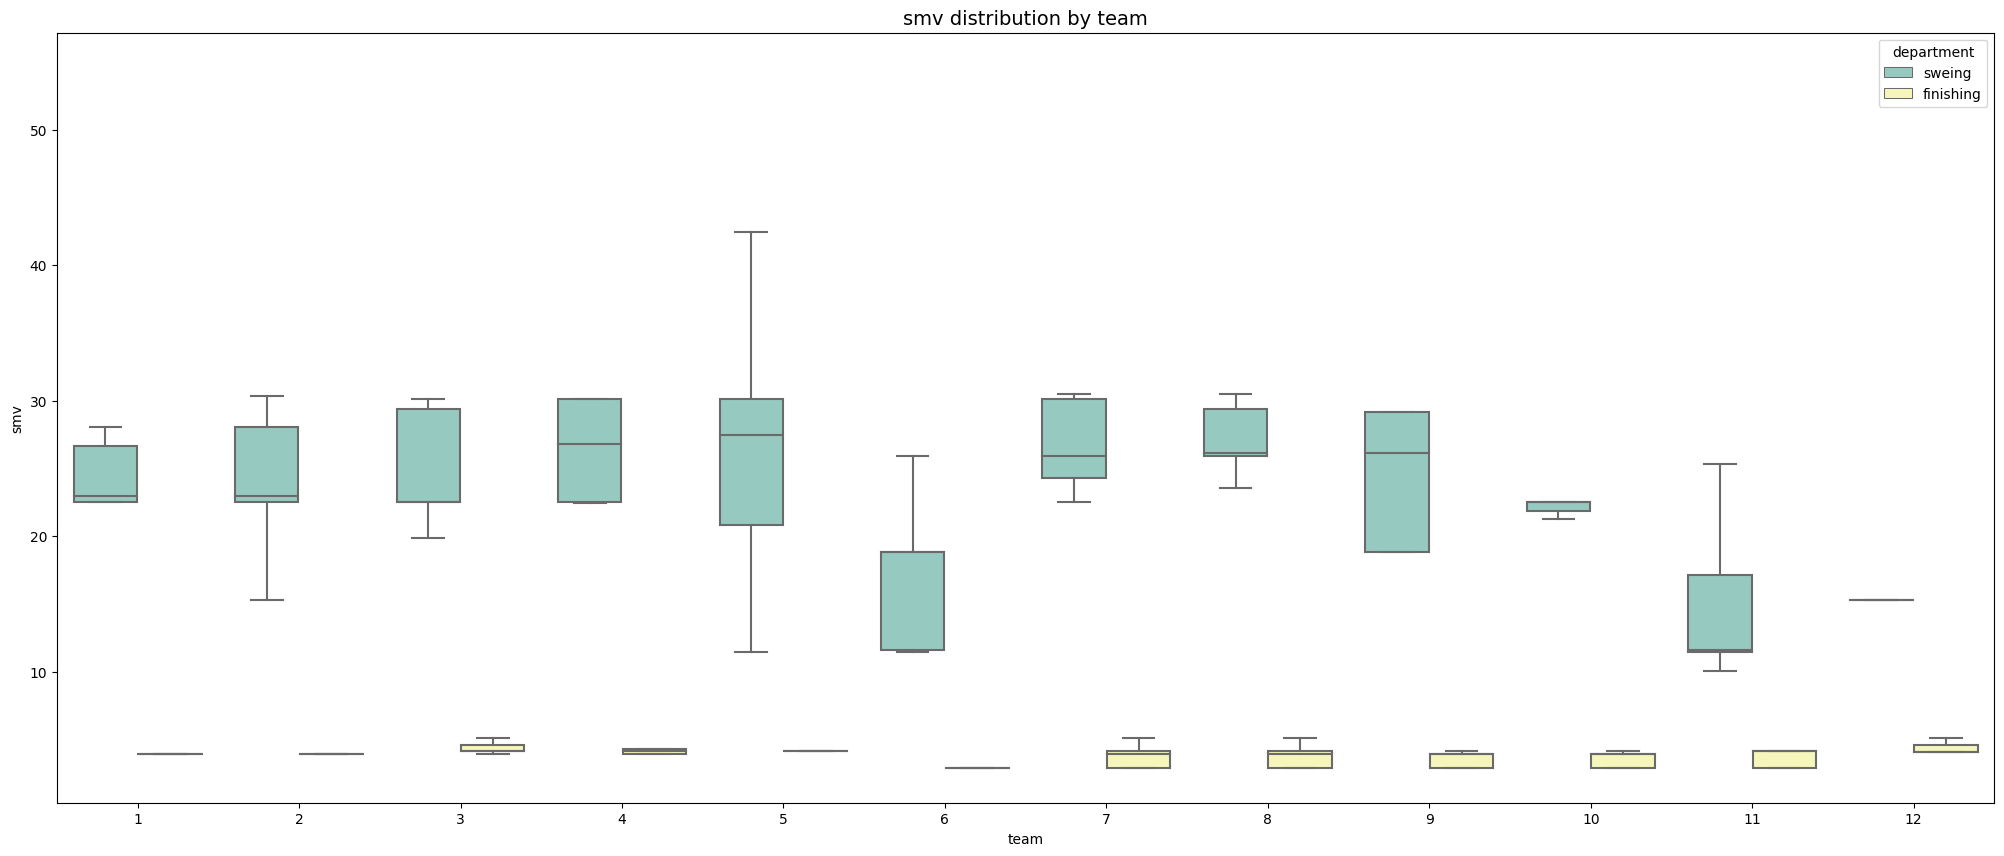

In [ ]:
plt.figure(figsize=(25, 10))
palette = "Set3"

sns.boxplot(x="team", y="smv", hue="department", data = df,
     palette = palette, fliersize = 0)

plt.title('smv distribution by team',fontsize= 14)
plt.show()

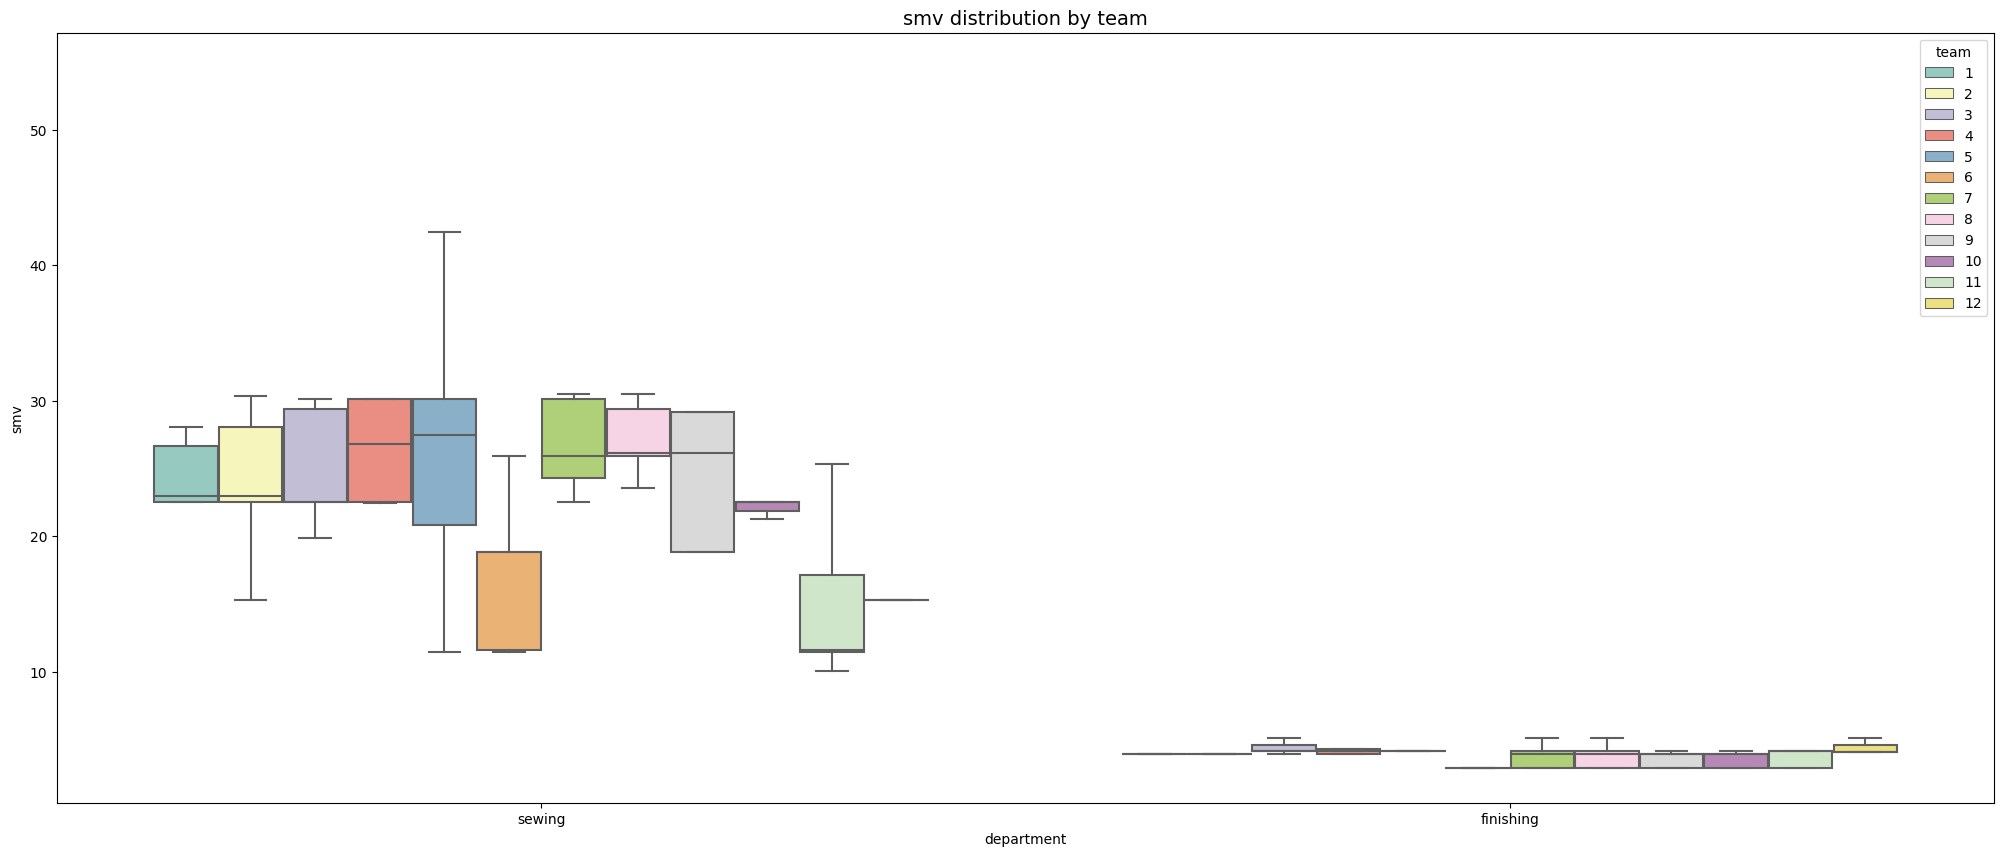

In [56]:
plt.figure(figsize=(25, 10))
palette = "Set3"

sns.boxplot(x="department", y="smv", hue="team", data = df,
     palette = palette, fliersize = 0)

plt.title('smv distribution by department',fontsize= 14)
plt.show()

<Axes: xlabel='no_of_workers', ylabel='smv'>

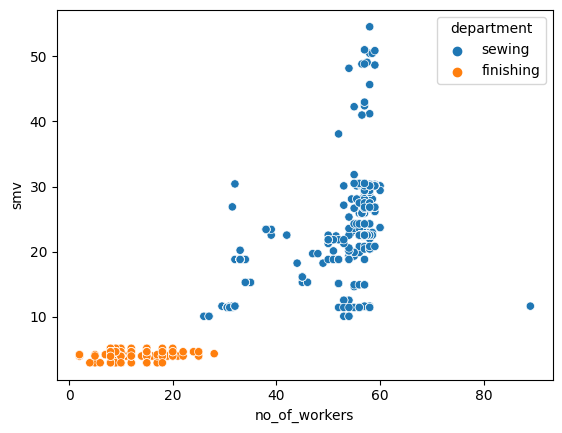

In [57]:
sns.scatterplot(data=df, x="no_of_workers", y="smv", hue="department")

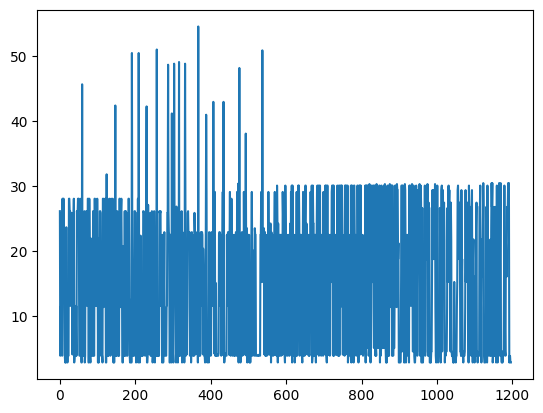

In [ ]:

plt.plot(df.index,df.smv)

## WIP

Work in progress. Includes the number of unfinished items for products

Values range from 7 to 23122.

Extreme outliers in the dataset

NaN values in dataset belong to finishing department

In [ ]:
df['wip']

0       1108.0
1          NaN
2        968.0
3        968.0
4       1170.0
         ...  
1192       NaN
1193       NaN
1194       NaN
1195       NaN
1196       NaN
Name: wip, Length: 1197, dtype: float64

<Axes: ylabel='Frequency'>

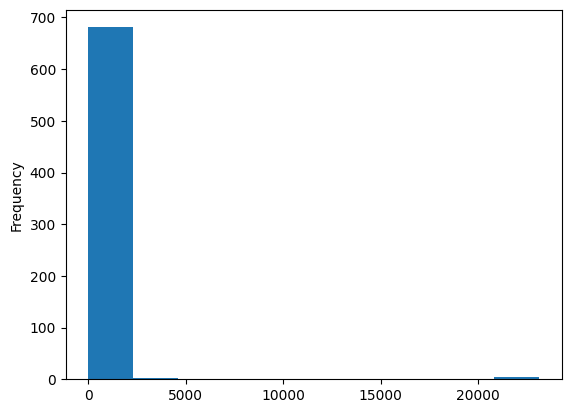

In [58]:
df.wip.plot.hist()

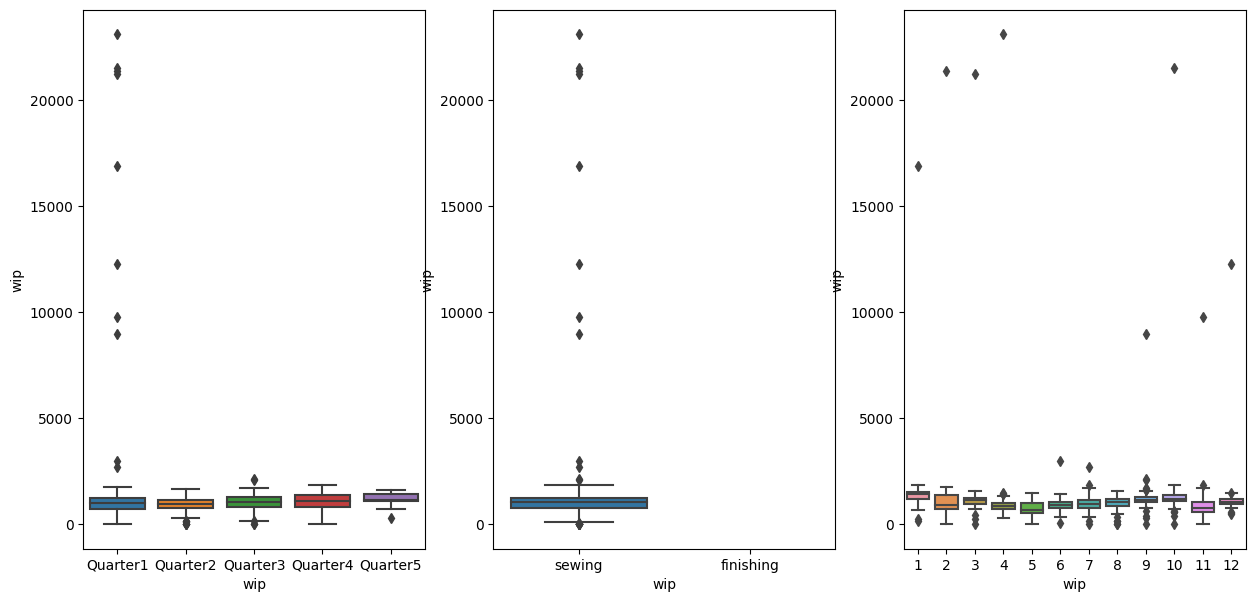

In [79]:
plt.figure(figsize=(15, 7))
palette='gist_rainbow'

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='quarter',y='wip')
plt.xlabel('wip')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='department',y='wip')
plt.xlabel('wip')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='team',y='wip')
plt.xlabel('wip')

plt.show()

([<matplotlib.axis.YTick at 0x7fdd2b7f3be0>,
 [Text(0, 0, '0'),
  Text(0, 2500, '2500'),
  Text(0, 5000, '5000'),
  Text(0, 7500, '7500'),
  Text(0, 10000, '10000'),
  Text(0, 12500, '12500'),
  Text(0, 15000, '15000'),
  Text(0, 17500, '17500'),
  Text(0, 20000, '20000'),
  Text(0, 22500, '22500'),
  Text(0, 25000, '25000'),
  Text(0, 27500, '27500')])

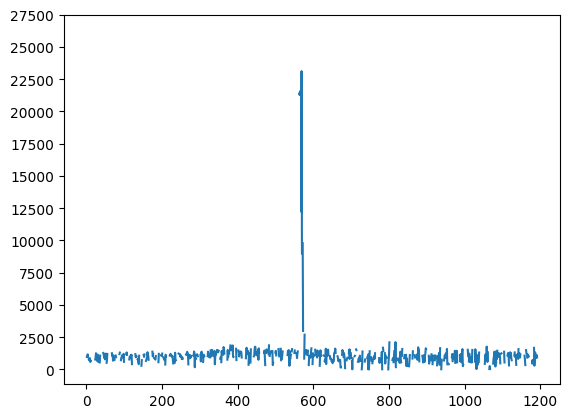

In [ ]:

plt.plot(df.index,df.wip)
plt.yticks(np.arange(0,30000,step=2500))

In [ ]:
df[df.isnull().any(axis=1)]

date   quarter  department        day  team  targeted_productivity  \
1    2015-01-01  Quarter1  finishing    Thursday     1                   0.75   
6    2015-01-01  Quarter1  finishing    Thursday     2                   0.75   
13   2015-01-01  Quarter1  finishing    Thursday    10                   0.65   
14   2015-01-01  Quarter1  finishing    Thursday     8                   0.75   
15   2015-01-01  Quarter1  finishing    Thursday     4                   0.75   
...         ...       ...         ...        ...   ...                    ...   
1192 2015-03-11  Quarter2   finishing  Wednesday    10                   0.75   
1193 2015-03-11  Quarter2   finishing  Wednesday     8                   0.70   
1194 2015-03-11  Quarter2   finishing  Wednesday     7                   0.65   
1195 2015-03-11  Quarter2   finishing  Wednesday     9                   0.75   
1196 2015-03-11  Quarter2   finishing  Wednesday     6                   0.70   

       smv  wip  over_time  incentive  idle_time  idle_men  \
1     3.94  NaN        960          0        0.0         0   
6     3.94  NaN        960          0        0.0         0   
13    3.94  NaN        960          0        0.0         0   
14    2.90  NaN        960          0        0.0         0   
15    3.94  NaN       2160          0        0.0         0   
...    ...  ...        ...        ...        ...       ...   
1192  2.90  NaN        960          0        0.0         0   
1193  3.90  NaN        960          0        0.0         0   
1194  3.90  NaN        960          0        0.0         0   
1195  2.90  NaN       1800          0        0.0         0   
1196  2.90  NaN        720          0        0.0         0   

      no_of_style_change  no_of_workers  actual_productivity  
1                      0            8.0             0.886500  
6                      0            8.0             0.755167  
13                     0            8.0             0.705917  
14                     0            8.0             0.676667  
15                     0           18.0             0.593056  
...                  ...            ...                  ...  
1192                   0            8.0             0.628333  
1193                   0            8.0             0.625625  
1194                   0            8.0             0.625625  
1195                   0           15.0             0.505889  
1196                   0            6.0             0.394722  

[506 rows x 15 columns]

In [ ]:
print(df[df['wip']>2500].shape)
df[df['wip']>2500]

(10, 15)


quarter department     day       date  team  targeted_productivity  \
561  Quarter1     sweing  Monday 2015-02-02     1                   0.80   
563  Quarter1     sweing  Monday 2015-02-02     2                   0.80   
564  Quarter1     sweing  Monday 2015-02-02     3                   0.80   
565  Quarter1     sweing  Monday 2015-02-02    10                   0.80   
568  Quarter1     sweing  Monday 2015-02-02    12                   0.80   
569  Quarter1     sweing  Monday 2015-02-02     4                   0.80   
570  Quarter1     sweing  Monday 2015-02-02     9                   0.75   
572  Quarter1     sweing  Monday 2015-02-02    11                   0.70   
573  Quarter1     sweing  Monday 2015-02-02     6                   0.70   
577  Quarter1     sweing  Monday 2015-02-02     7                   0.70   

       smv      wip  over_time  incentive  idle_time  idle_men  \
561  22.94  16882.0       7020        113        0.0         0   
563  22.52  21385.0       7020         88        0.0         0   
564  22.52  21266.0       6840         70        0.0         0   
565  22.52  21540.0       6720         88        0.0         0   
568  15.26  12261.0       3600         63        0.0         0   
569  22.52  23122.0       5940         50        0.0         0   
570  29.12   8992.0       6960         55        0.0         0   
572  20.55   9792.0       6480         60        0.0         0   
573  18.79   2984.0       3960         30        0.0         0   
577  24.26   2698.0       6720          0        0.0         0   

     no_of_style_change  no_of_workers  actual_productivity  
561                   0           58.5             1.000602  
563                   0           58.5             0.900158  
564                   0           57.0             0.900142  
565                   0           56.0             0.900130  
568                   0           35.0             0.800402  
569                   0           56.5             0.800393  
570                   0           58.0             0.799963  
572                   0           54.0             0.700398  
573                   0           33.0             0.700355  
577                   0           56.0             0.295308

## Overtime

Represents the amount of overtime by each team in minutes

Values range from 0 to 25920. 

Extreme outliers. 

The majority are 0, 960, 1440

<Axes: ylabel='Frequency'>

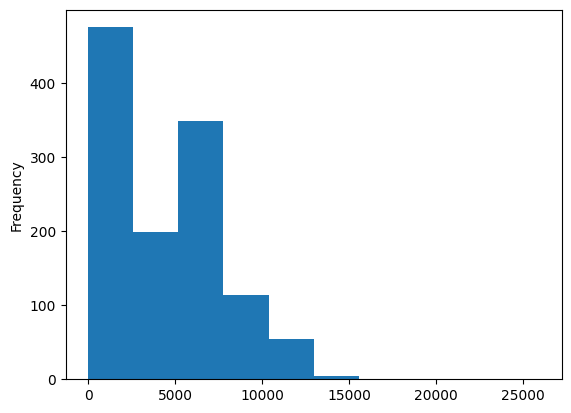

In [60]:
df.over_time.plot.hist()

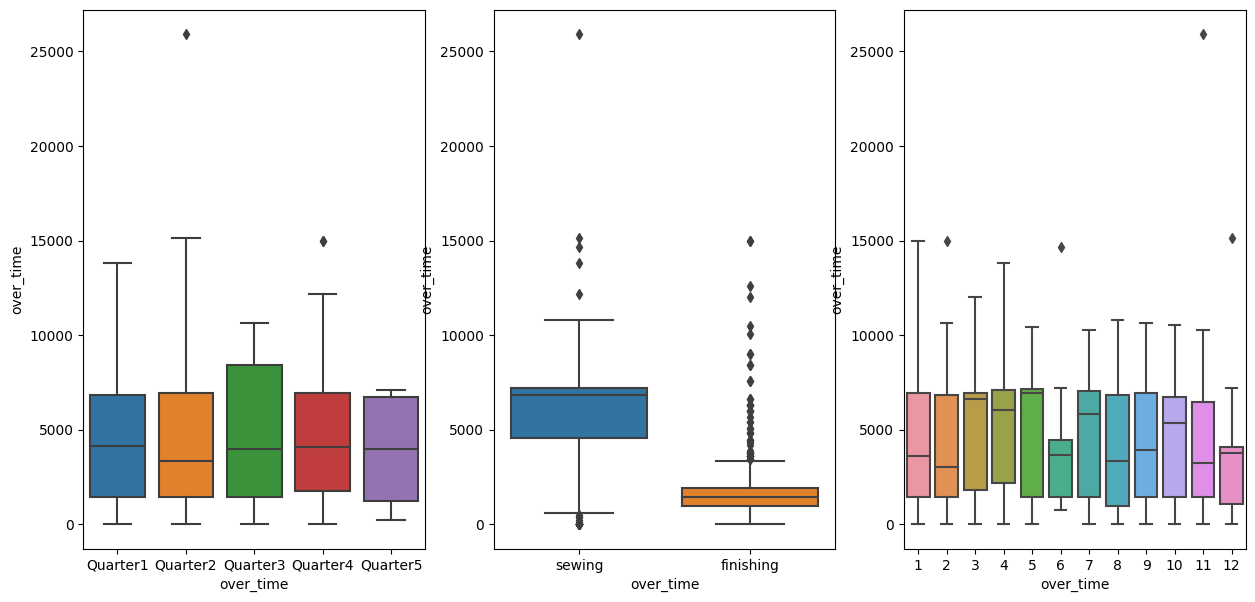

In [80]:
plt.figure(figsize=(15, 7))
palette='gist_rainbow'

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='quarter',y='over_time')
plt.xlabel('over_time')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='department',y='over_time')
plt.xlabel('over_time')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='team',y='over_time')
plt.xlabel('over_time')

plt.show()

In [ ]:
over_time_by_team_department = df.groupby(['department', 'team']).median()['over_time']

for team in range(1, 12):
    for department in ['sweing', 'finishing']:
        print('Median over_time of team {} {}s: {}'.format(team, department, over_time_by_team_department[department][team]))
print('Median over_time of teams: {}'.format(df['over_time'].median()))

Median over_time of team 1 sweings: 6960.0
Median over_time of team 1 finishings: 1440.0
Median over_time of team 2 sweings: 6840.0
Median over_time of team 2 finishings: 1440.0
Median over_time of team 3 sweings: 6840.0
Median over_time of team 3 finishings: 1800.0
Median over_time of team 4 sweings: 7020.0
Median over_time of team 4 finishings: 1920.0
Median over_time of team 5 sweings: 7080.0
Median over_time of team 5 finishings: 1440.0
Median over_time of team 6 sweings: 3960.0
Median over_time of team 6 finishings: 960.0
Median over_time of team 7 sweings: 6960.0
Median over_time of team 7 finishings: 1440.0
Median over_time of team 8 sweings: 6840.0
Median over_time of team 8 finishings: 1440.0
Median over_time of team 9 sweings: 6930.0
Median over_time of team 9 finishings: 1140.0
Median over_time of team 10 sweings: 6720.0
Median over_time of team 10 finishings: 1440.0
Median over_time of team 11 sweings: 3660.0
Median over_time of team 11 finishings: 1440.0
Median over_time o

<ipython-input-22-975b81b0b3f8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  over_time_by_team_department = df.groupby(['department', 'team']).median()['over_time']


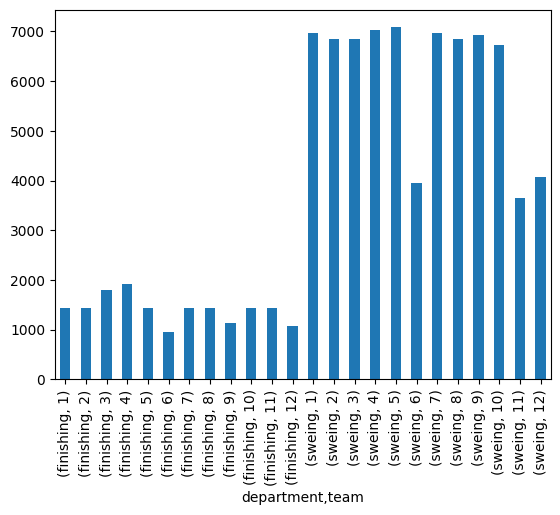

In [ ]:
over_time_by_team_department.plot.bar()
plt.show()

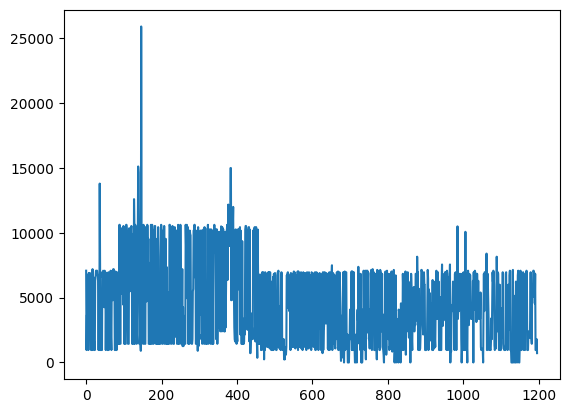

In [ ]:
plt.plot(df.index,df.over_time)

In [ ]:
print(df[df['over_time']>12000].shape)
df[df['over_time']>12000]

(8, 15)


quarter department       day       date  team  targeted_productivity  \
36   Quarter1     sweing  Saturday 2015-01-03     4                   0.70   
127  Quarter2  finishing  Thursday 2015-01-08     4                   0.80   
138  Quarter2     sweing  Thursday 2015-01-08    12                   0.80   
139  Quarter2     sweing  Thursday 2015-01-08     6                   0.80   
146  Quarter2     sweing  Thursday 2015-01-08    11                   0.35   
377  Quarter4     sweing  Thursday 2015-01-22     1                   0.70   
383  Quarter4  finishing  Thursday 2015-01-22     1                   0.70   
384  Quarter4  finishing  Thursday 2015-01-22     2                   0.70   

       smv     wip  over_time  incentive  idle_time  idle_men  \
36   23.69   544.0      13800          0        0.0         0   
127   3.94     NaN      12600          0        0.0         0   
138  11.61   548.0      15120         63        0.0         0   
139  11.41   411.0      14640         50        0.0         0   
146  12.52   287.0      25920         38        0.0         0   
377  22.94  1384.0      12180         63        0.0         0   
383   3.94     NaN      15000          0        0.0         0   
384   3.94     NaN      15000          0        0.0         0   

     no_of_style_change  no_of_workers  actual_productivity  
36                    0           60.0             0.700134  
127                   0           20.0             0.919905  
138                   0           31.5             0.800107  
139                   0           30.5             0.800025  
146                   0           54.0             0.349951  
377                   0           57.0             0.750162  
383                   0           25.0             0.649662  
384                   0           25.0             0.649662

## Incentive

Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action

Values range from 0 to 3600. Extreme outliers. The majority is 0

<Axes: ylabel='Frequency'>

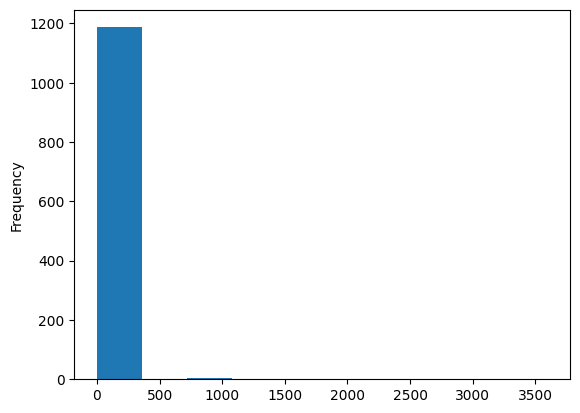

In [59]:
df.incentive.plot.hist()

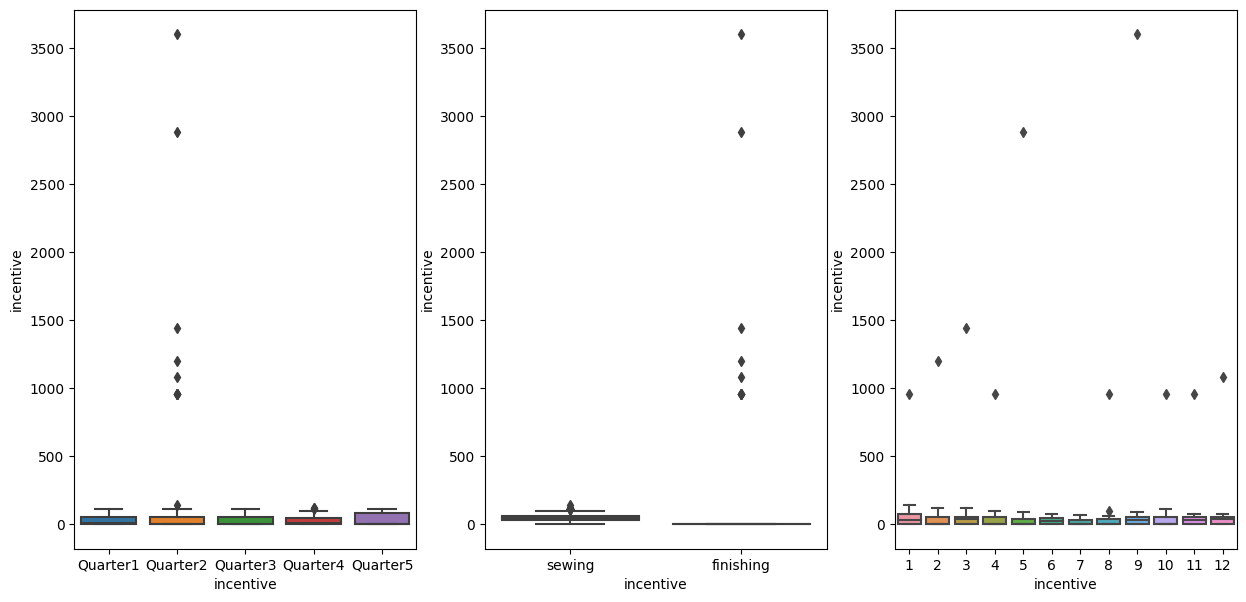

In [77]:
plt.figure(figsize=(15, 7))
palette='gist_rainbow'

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='quarter',y='incentive')
plt.xlabel('incentive')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='department',y='incentive')
plt.xlabel('incentive')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='team',y='incentive')
plt.xlabel('incentive')

plt.show()

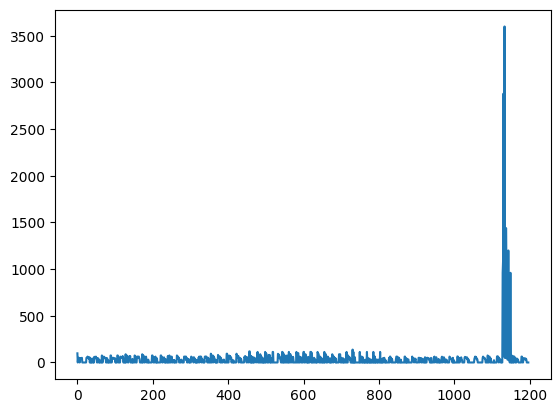

In [ ]:
plt.plot(df.index,df.incentive)

In [ ]:
print(df[df['incentive']>150].shape)
df[df['incentive']>150]

(10, 15)


quarter department     day       date  team  targeted_productivity  \
1128  Quarter2  finishing  Monday 2015-03-09    11                   0.80   
1129  Quarter2  finishing  Monday 2015-03-09    12                   0.80   
1130  Quarter2  finishing  Monday 2015-03-09     5                   0.60   
1133  Quarter2  finishing  Monday 2015-03-09     9                   0.75   
1137  Quarter2  finishing  Monday 2015-03-09     3                   0.80   
1138  Quarter2  finishing  Monday 2015-03-09     4                   0.75   
1139  Quarter2  finishing  Monday 2015-03-09     1                   0.75   
1143  Quarter2  finishing  Monday 2015-03-09     2                   0.70   
1148  Quarter2  finishing  Monday 2015-03-09    10                   0.70   
1149  Quarter2  finishing  Monday 2015-03-09     8                   0.65   

       smv  wip  over_time  incentive  idle_time  idle_men  \
1128  2.90  NaN          0        960        0.0         0   
1129  4.60  NaN          0       1080        0.0         0   
1130  3.94  NaN          0       2880        0.0         0   
1133  2.90  NaN          0       3600        0.0         0   
1137  4.60  NaN          0       1440        0.0         0   
1138  3.94  NaN          0        960        0.0         0   
1139  3.94  NaN          0        960        0.0         0   
1143  3.90  NaN          0       1200        0.0         0   
1148  2.90  NaN          0        960        0.0         0   
1149  3.90  NaN          0        960        0.0         0   

      no_of_style_change  no_of_workers  actual_productivity  
1128                   0            8.0             0.960625  
1129                   0            9.0             0.902963  
1130                   0           12.0             0.864343  
1133                   0           15.0             0.841000  
1137                   0           12.0             0.795417  
1138                   0            8.0             0.795388  
1139                   0            8.0             0.794567  
1143                   0           10.0             0.682500  
1148                   0            8.0             0.477292  
1149                   0            8.0             0.264062

## Idle Time

The amount of time when the production was interrupted due to several reasons

Values range from 0 to 300. 

Extreme outliers. 

The majority is 0

<Axes: ylabel='Frequency'>

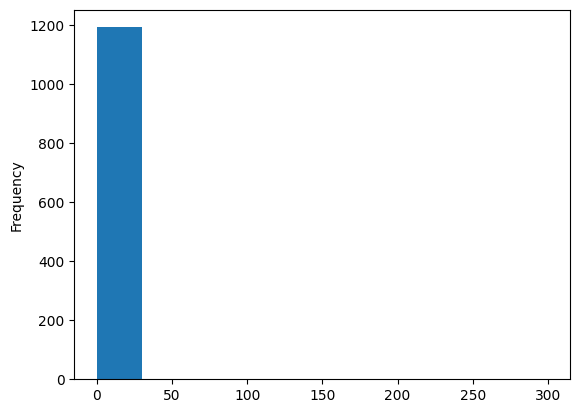

In [63]:
df.idle_time.plot.hist()

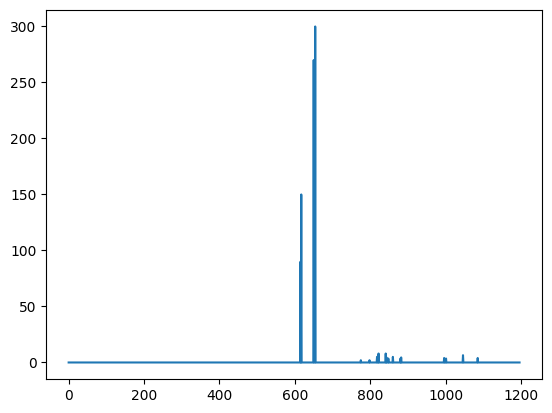

In [ ]:
plt.plot(df.index,df.idle_time)

In [ ]:
print(df[df['idle_time']>20].shape)
df[df['idle_time']>20]

(4, 15)


quarter department        day       date  team  targeted_productivity  \
615  Quarter1     sweing  Wednesday 2015-02-04     5                   0.65   
617  Quarter1     sweing  Wednesday 2015-02-04     4                   0.35   
650  Quarter1     sweing   Saturday 2015-02-07     7                   0.70   
654  Quarter1     sweing   Saturday 2015-02-07     8                   0.70   

       smv    wip  over_time  incentive  idle_time  idle_men  \
615  30.10  326.0       5820          0       90.0        10   
617  30.10  287.0       6060         23      150.0        15   
650  24.26  658.0       6960          0      270.0        45   
654  24.26  652.0       6840          0      300.0        37   

     no_of_style_change  no_of_workers  actual_productivity  
615                   0           58.5             0.650835  
617                   0           55.5             0.350706  
650                   0           58.0             0.662270  
654                   0           57.0             0.365319

## Idle Men

The number of workers who were idle due to production interruption

Values range from 0 to 45. The majority is 0

<Axes: ylabel='Frequency'>

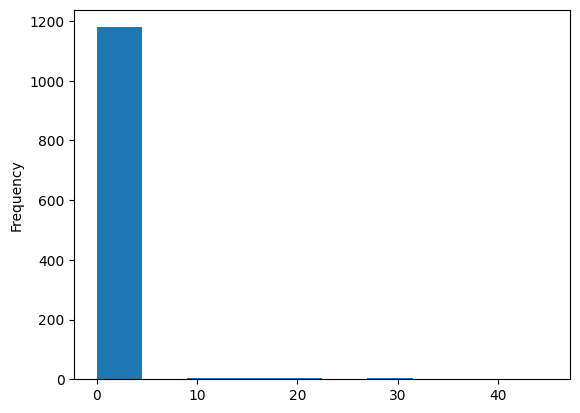

In [64]:
df.idle_men.plot.hist()

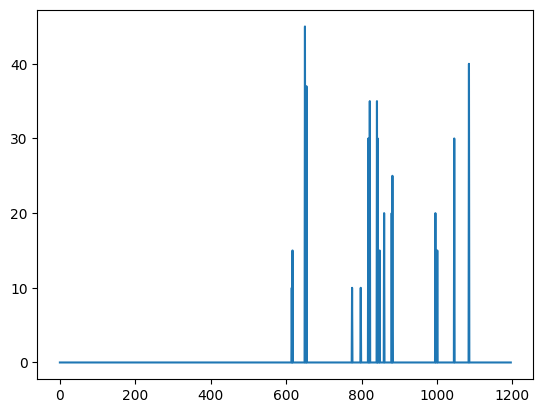

In [ ]:
plt.plot(df.index,df.idle_men)

In [ ]:
print(df[df['idle_men']>0].shape)
df[df['idle_men']>0]

(18, 15)


quarter department        day       date  team  targeted_productivity  \
615   Quarter1     sweing  Wednesday 2015-02-04     5                   0.65   
617   Quarter1     sweing  Wednesday 2015-02-04     4                   0.35   
650   Quarter1     sweing   Saturday 2015-02-07     7                   0.70   
654   Quarter1     sweing   Saturday 2015-02-07     8                   0.70   
775   Quarter3     sweing     Sunday 2015-02-15     8                   0.70   
798   Quarter3     sweing     Monday 2015-02-16     8                   0.70   
818   Quarter3     sweing    Tuesday 2015-02-17     8                   0.60   
822   Quarter3     sweing    Tuesday 2015-02-17    10                   0.65   
841   Quarter3     sweing  Wednesday 2015-02-18    10                   0.70   
843   Quarter3     sweing  Wednesday 2015-02-18     8                   0.65   
848   Quarter3     sweing   Thursday 2015-02-19     5                   0.80   
860   Quarter3     sweing   Thursday 2015-02-19     7                   0.75   
880   Quarter4     sweing     Sunday 2015-02-22     7                   0.75   
882   Quarter4     sweing     Sunday 2015-02-22     5                   0.80   
996   Quarter1     sweing     Sunday 2015-03-01    11                   0.80   
1001  Quarter1     sweing     Sunday 2015-03-01     7                   0.80   
1046  Quarter1     sweing    Tuesday 2015-03-03     2                   0.40   
1085  Quarter1     sweing   Thursday 2015-03-05     7                   0.80   

        smv     wip  over_time  incentive  idle_time  idle_men  \
615   30.10   326.0       5820          0       90.0        10   
617   30.10   287.0       6060         23      150.0        15   
650   24.26   658.0       6960          0      270.0        45   
654   24.26   652.0       6840          0      300.0        37   
775   30.10   507.0       5880         40        2.0        10   
798   30.10     7.0       7080         27        2.0        10   
818   29.40   179.0          0         23        5.0        30   
822   18.22   741.0          0          0        8.0        35   
841   19.68  1119.0       5640          0        8.0        35   
843   29.40   962.0       4560          0        4.5        30   
848   30.10   276.0        600         63        3.5        15   
860   30.10   444.0          0          0        5.0        20   
880   30.10   627.0       6960          0        3.5        20   
882   30.10   450.0       5700          0        4.5        25   
996   11.61   347.0          0         50        4.0        20   
1001  30.10   934.0       6960          0        3.5        15   
1046  15.28   157.0       5400          0        6.5        30   
1085  30.10   834.0       1200          0        4.0        40   

      no_of_style_change  no_of_workers  actual_productivity  
615                    0           58.5             0.650835  
617                    0           55.5             0.350706  
650                    0           58.0             0.662270  
654                    0           57.0             0.365319  
775                    1           59.0             0.700573  
798                    2           59.0             0.621972  
818                    2           58.0             0.600983  
822                    1           49.0             0.302117  
841                    1           47.0             0.303574  
843                    2           57.0             0.251399  
848                    0           59.5             0.799983  
860                    1           59.0             0.611141  
880                    1           58.0             0.393549  
882                    0           60.0             0.307501  
996                    0           57.0             0.682433  
1001                   0           58.0             0.579511  
1046                   1           45.0             0.302770  
1085                   0           59.0             0.366054

## Style Change

Number of changes in the style of a particular product

Only has 3 values - 0,1,2. The majority is 0

<Axes: ylabel='Frequency'>

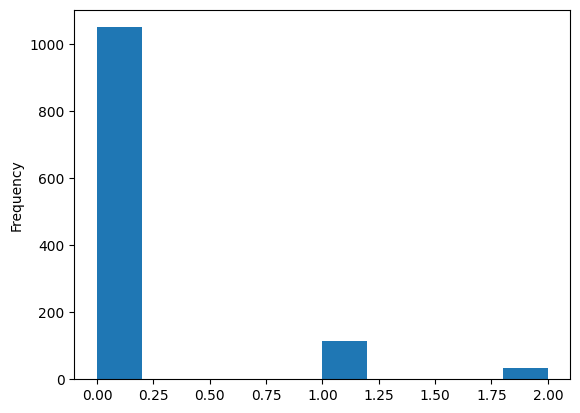

In [65]:
df.no_of_style_change.plot.hist()

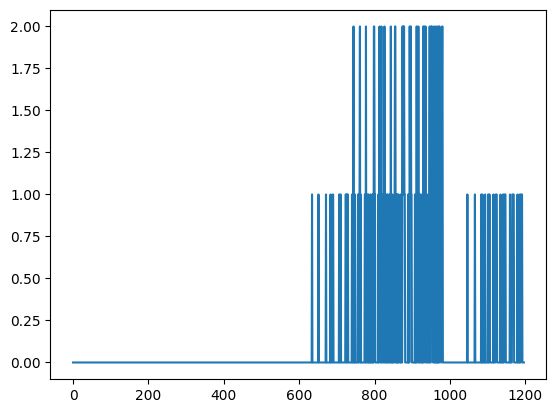

In [ ]:
plt.plot(df.index,df.no_of_style_change)

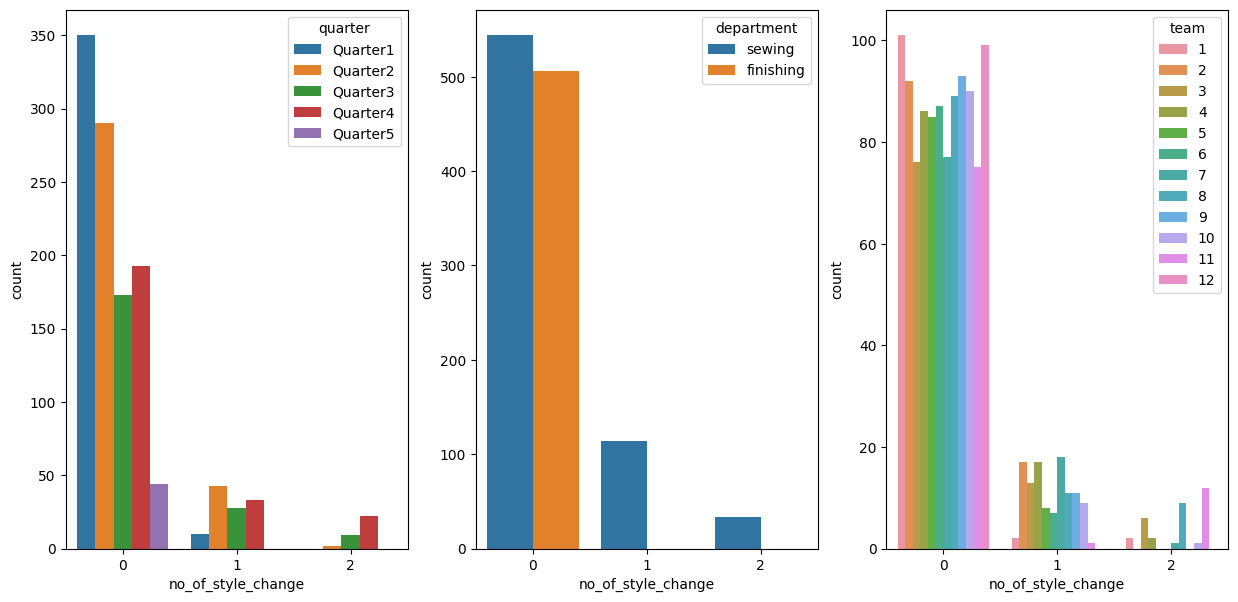

In [71]:
plt.figure(figsize=(15, 7))
palette='gist_rainbow'

plt.subplot(1, 3, 1)
sns.countplot(data=df, x='no_of_style_change',hue='quarter')
plt.xlabel('no_of_style_change')

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='no_of_style_change',hue='department')
plt.xlabel('no_of_style_change')

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='no_of_style_change',hue='team')
plt.xlabel('no_of_style_change')

plt.show()

Workers

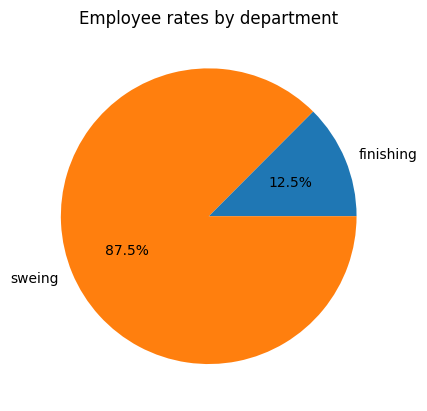

In [ ]:
data = df.groupby(['department']).no_of_workers.sum()
data.plot.pie(title="Employee rates by department",autopct='%1.1f%%')
plt.ylabel(None)
plt.show()

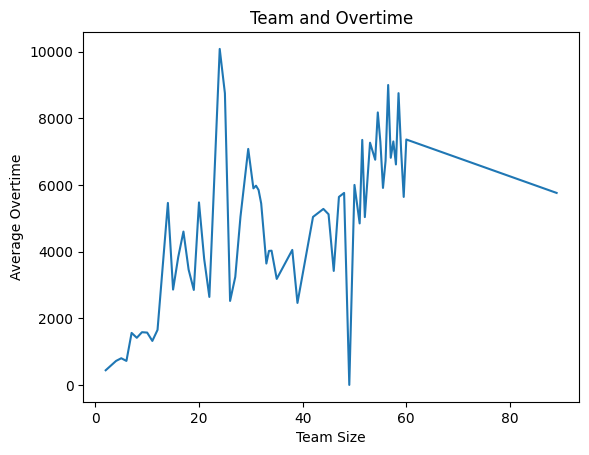

In [ ]:
x_axis = df['no_of_workers'].unique()
y_axis=[]
for val in x_axis:
    y_axis.append(df['over_time'][df['no_of_workers'] == val].mean())

sns.lineplot(x=x_axis, y=y_axis)
plt.title("Team and Overtime")
plt.xlabel('Team Size')
plt.ylabel('Average Overtime')
plt.show()

# Data Formatting

In [18]:
# Date to datetime
df['date'] = pd.to_datetime(df['date'])
# Replace Null WIP with 0
df['wip'] = df['wip'].fillna(0)

print(df.isnull().sum())

quarter                  0
department               0
day                      0
date                     0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


# Pairplot

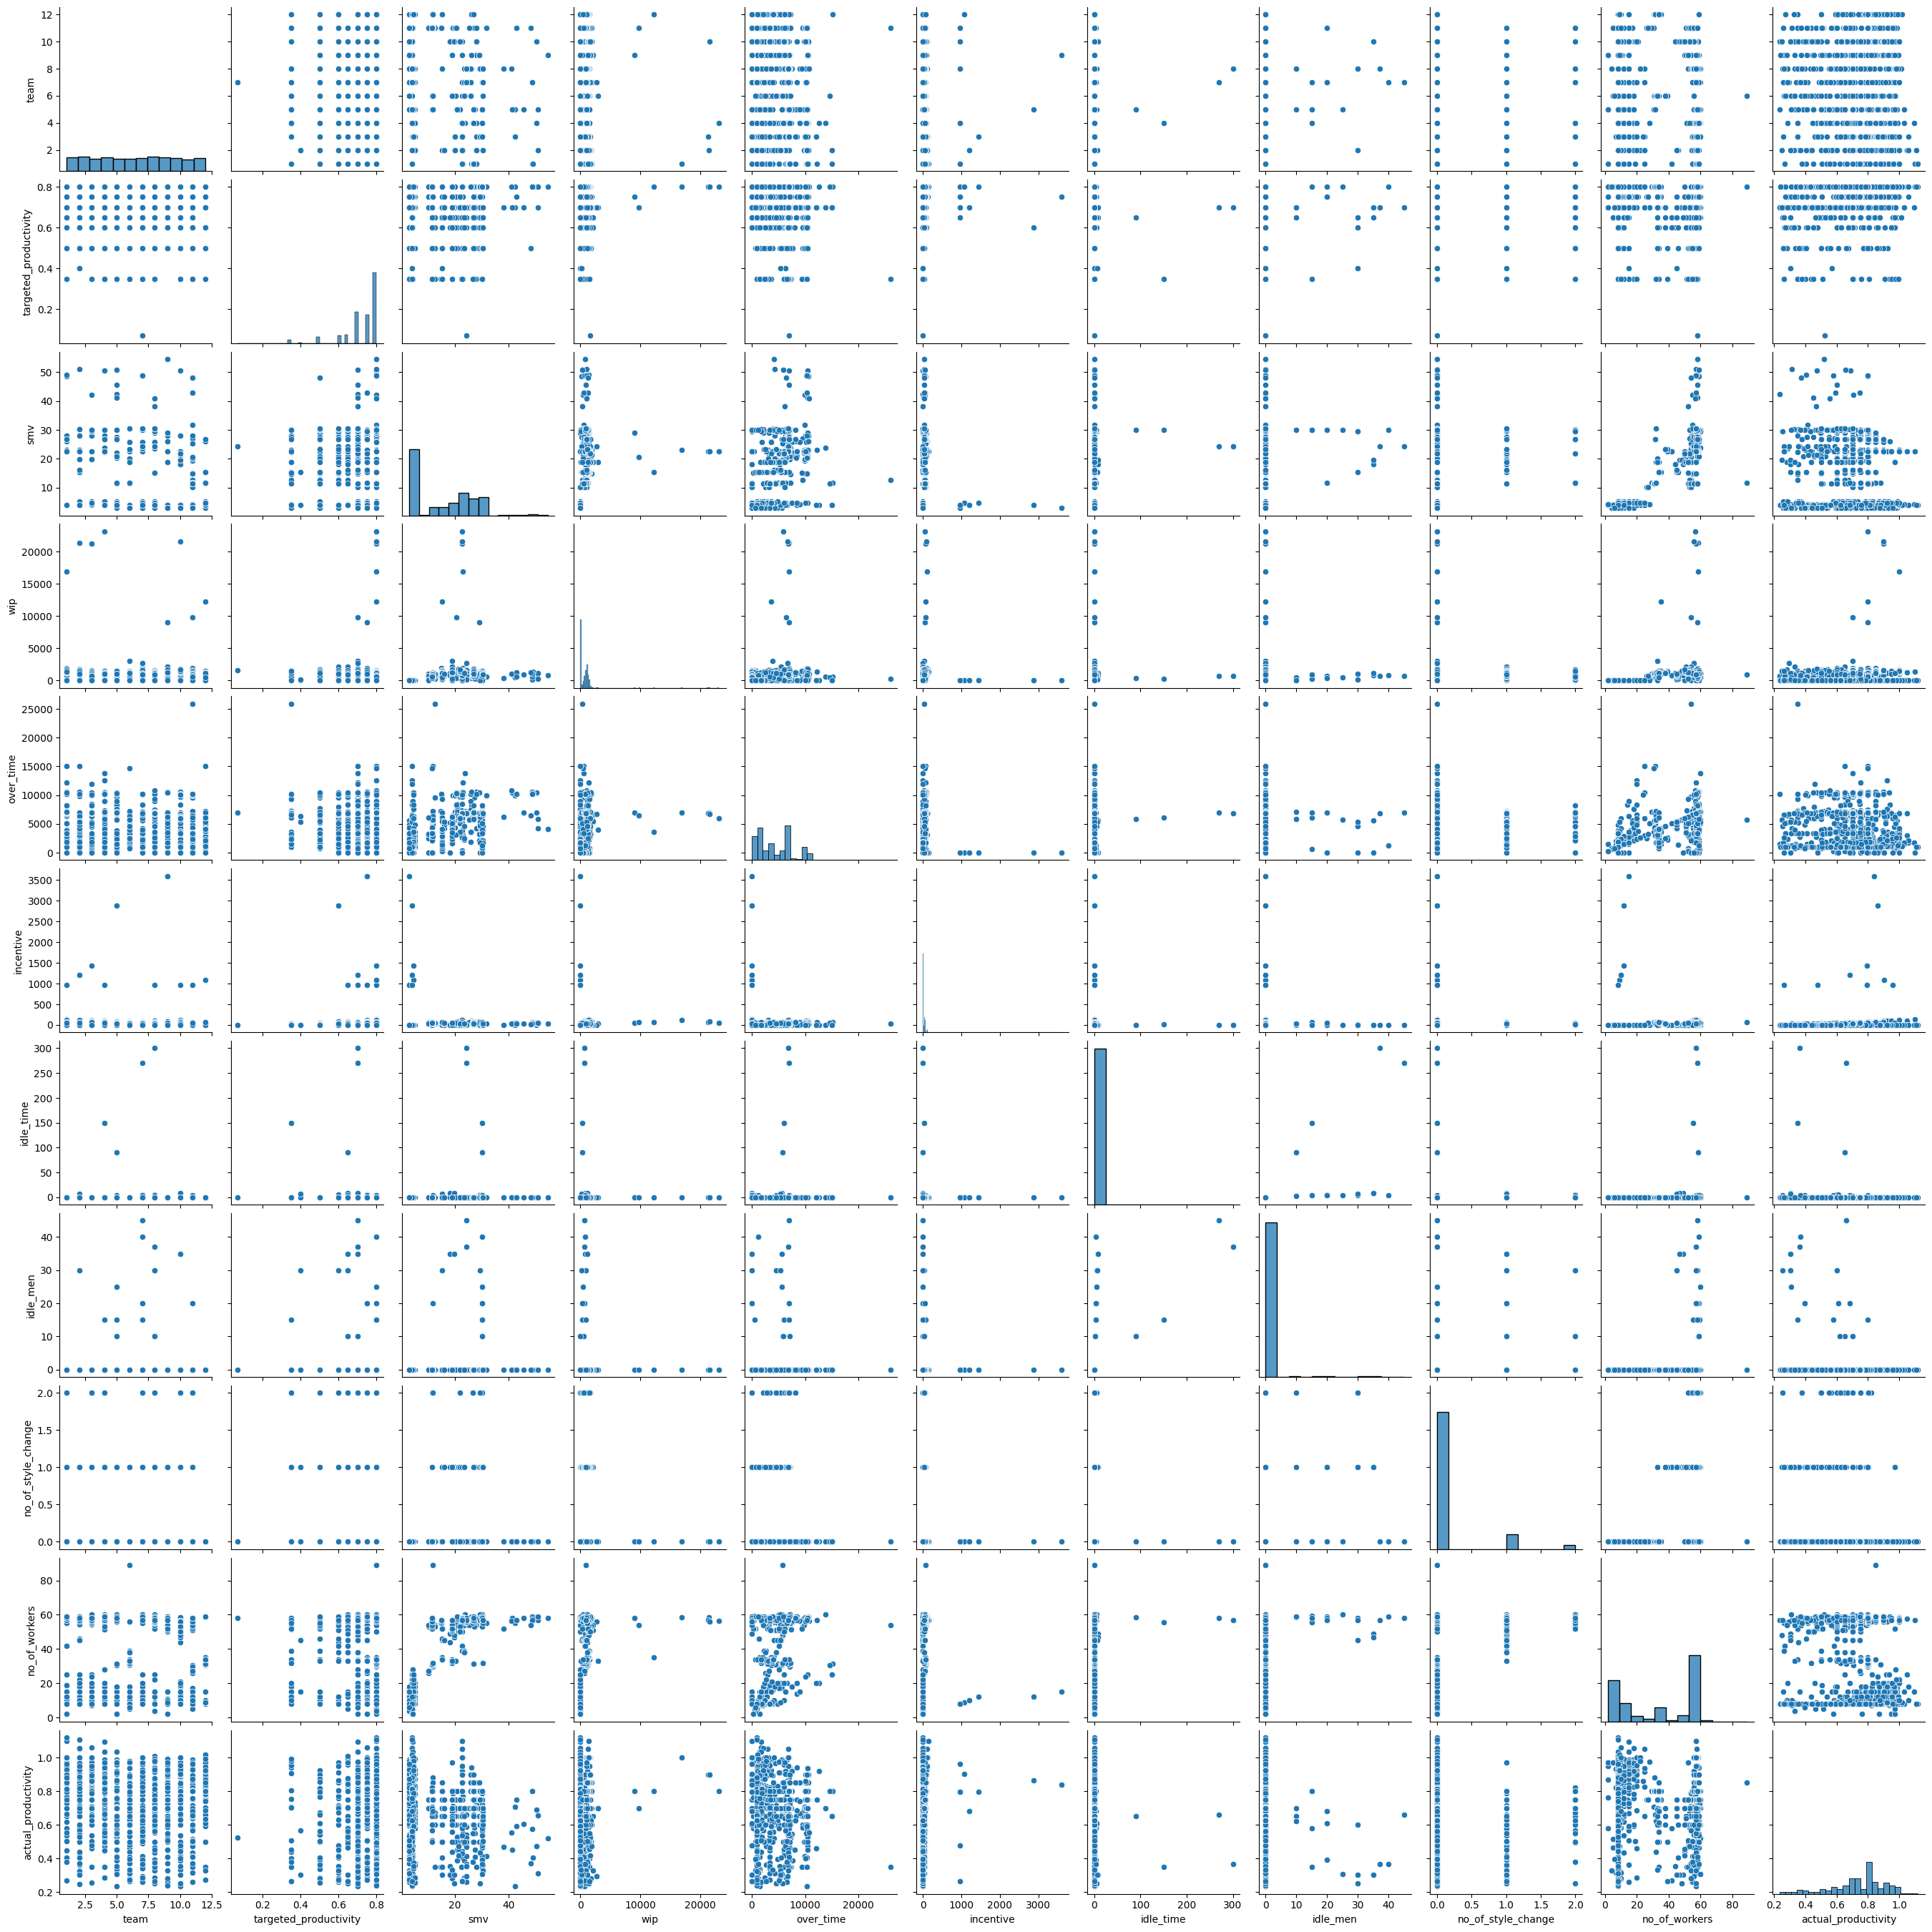

In [19]:
sns.pairplot(df)

# Actual Productivity

The actual % of productivity that was delivered by the workers. It ranges from 0-1

Values range from 0.2337 to 1.1204

In [ ]:
df['actual_productivity'].describe()

count    1197.000000
mean        0.735091
std         0.174488
min         0.233705
25%         0.650307
50%         0.773333
75%         0.850253
max         1.120437
Name: actual_productivity, dtype: float64

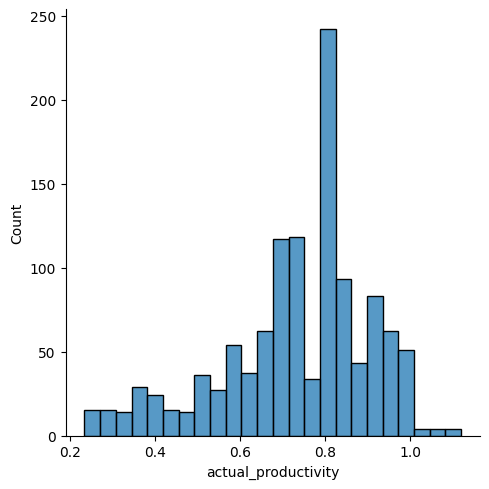

In [ ]:
sns.displot(df['actual_productivity'])

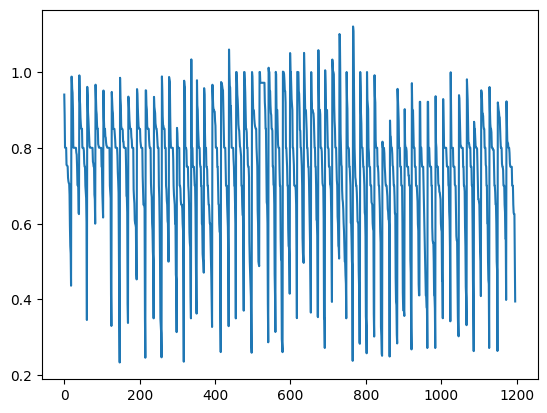

In [ ]:
plt.plot(df.index,df.actual_productivity)

<Axes: >

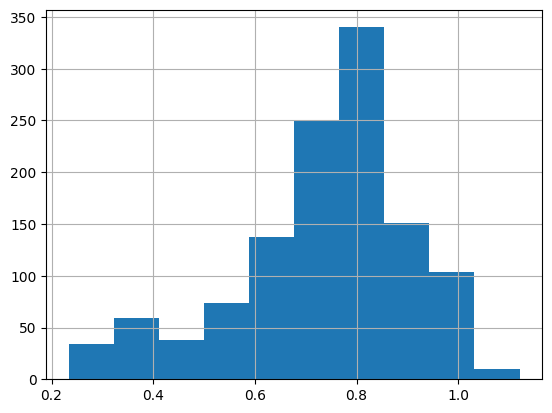

In [ ]:
df.actual_productivity.hist()

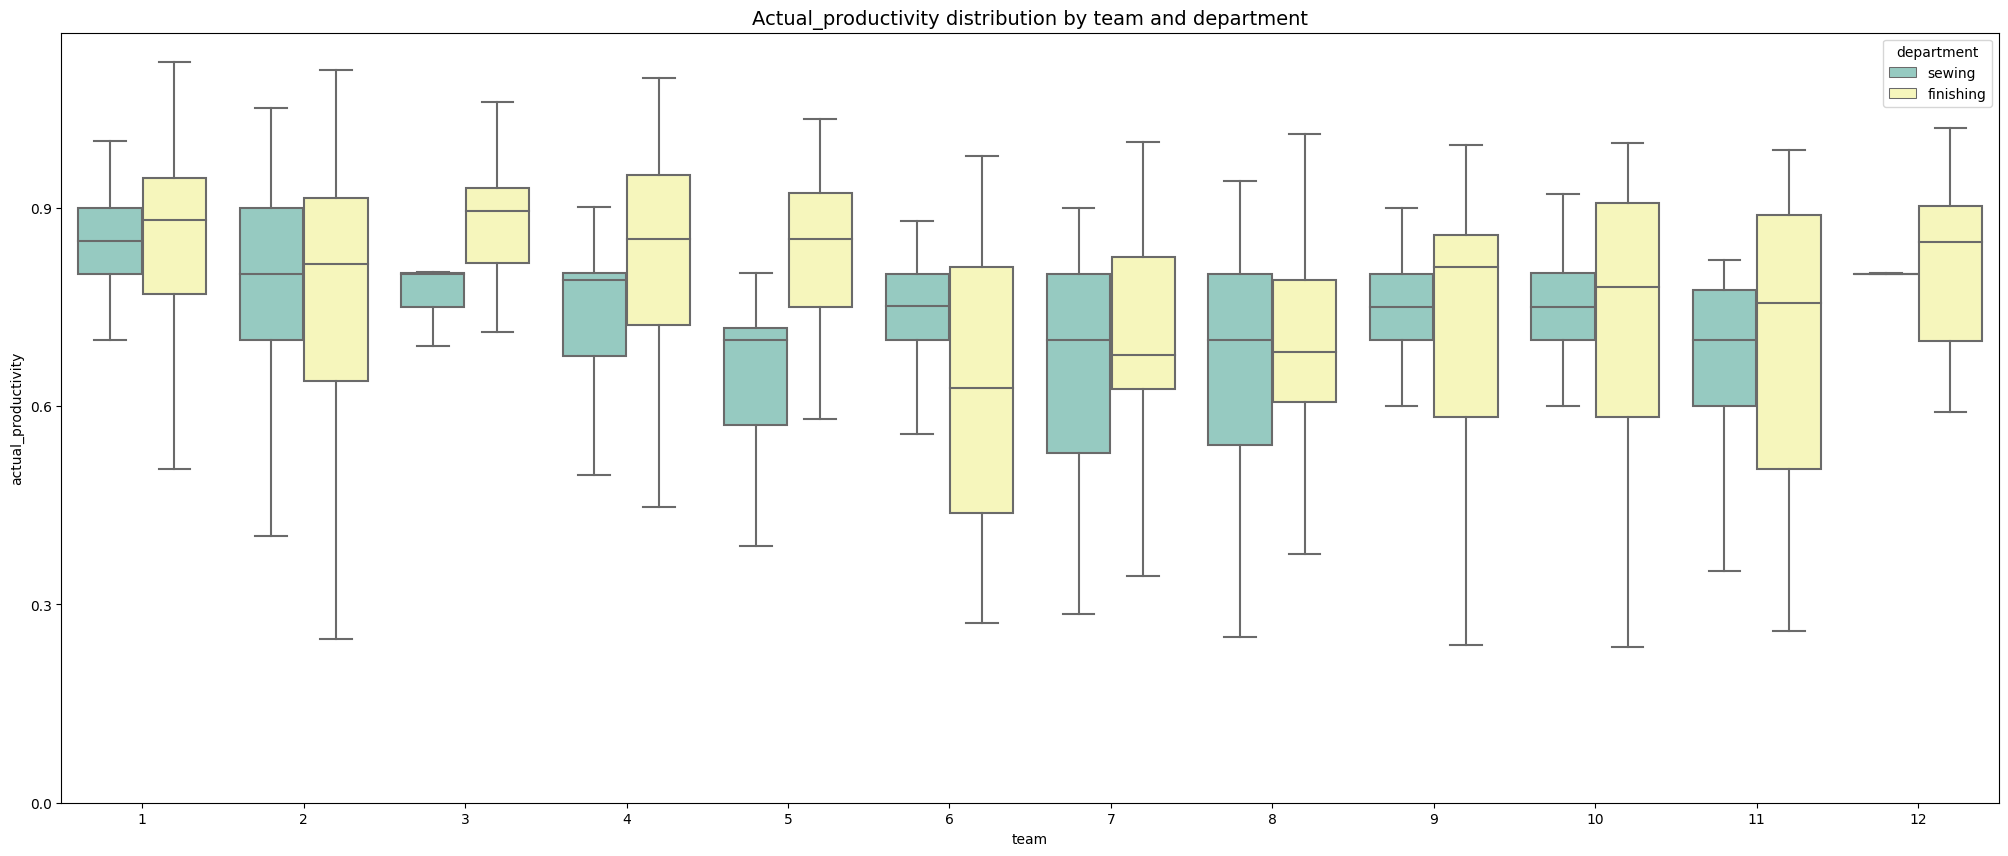

In [94]:
plt.figure(figsize=(25, 10))
palette = "Set3"

sns.boxplot(x = 'team', y = 'actual_productivity', data = df,
     palette = palette,hue='department',fliersize = 0)
plt.yticks(np.arange(0,1.2,step=0.3))
plt.title('Actual_productivity distribution by team and department',fontsize= 14)
plt.show()

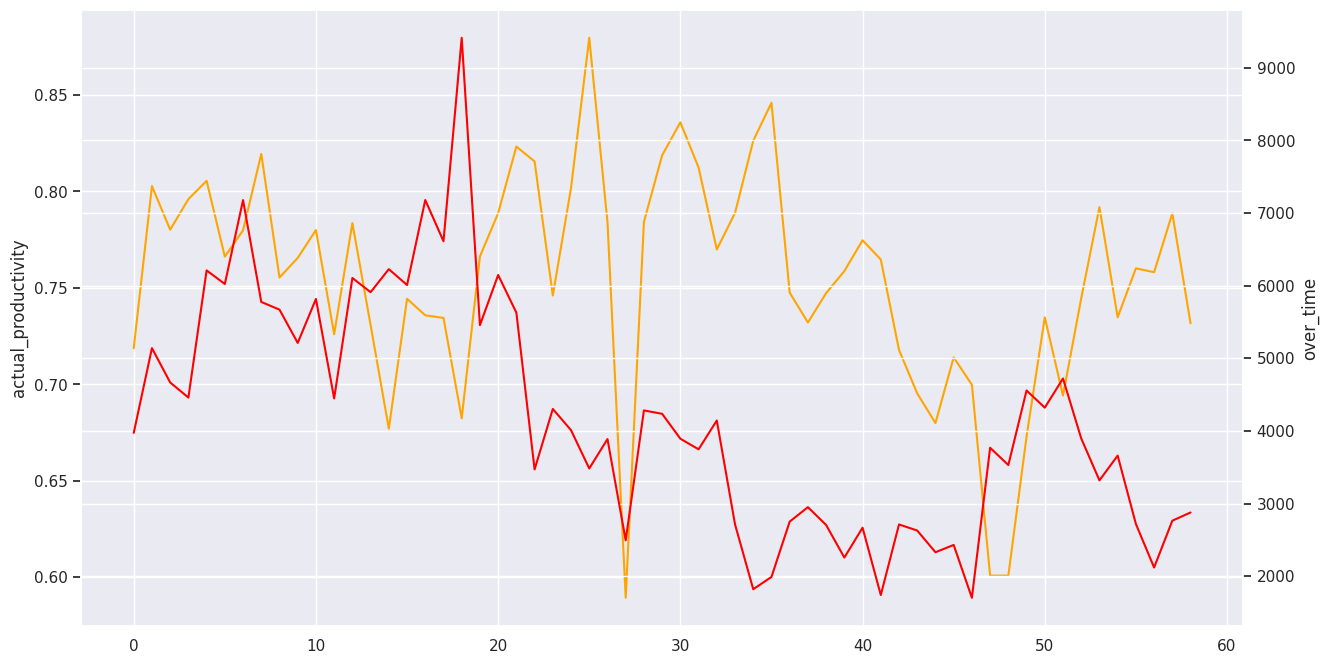

In [ ]:
df_temp = pd.concat([df[['date', 'actual_productivity']].groupby('date')['actual_productivity'].mean().reset_index(), df[['date', 'over_time']].groupby('date')['over_time'].mean().reset_index().drop(columns=['date'])], axis=1)
plt.figure(figsize = (15,8))
sns.lineplot(data = df_temp.actual_productivity, color = "orange")
ax2 = plt.twinx()
sns.lineplot(data = df_temp.over_time, ax = ax2, color = "red");

# Targeted Productivity

Targeted productivity set by the Authority for each team for each day.

Has 9 unique values - range is 0.07 - 0.8. Very likely to have outliers

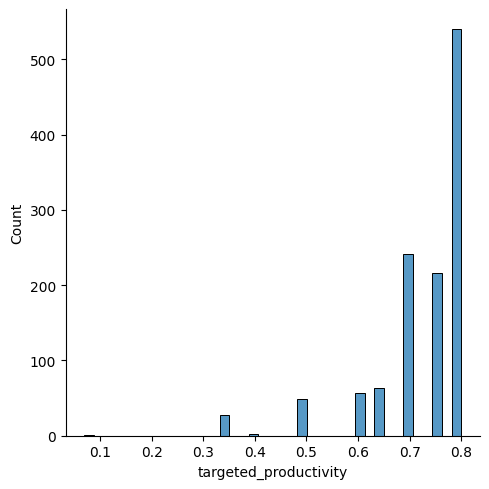

In [ ]:
sns.displot(df['targeted_productivity'])

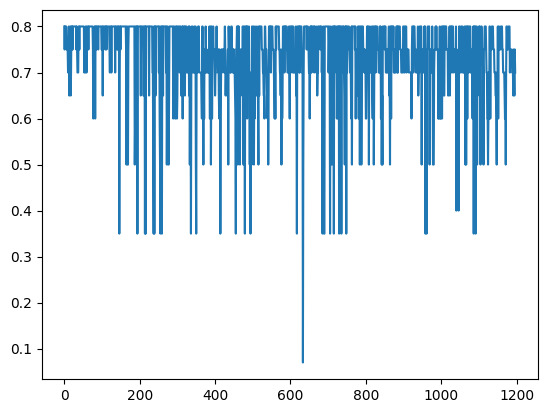

In [ ]:
plt.plot(df.index,df.targeted_productivity)

<Axes: >

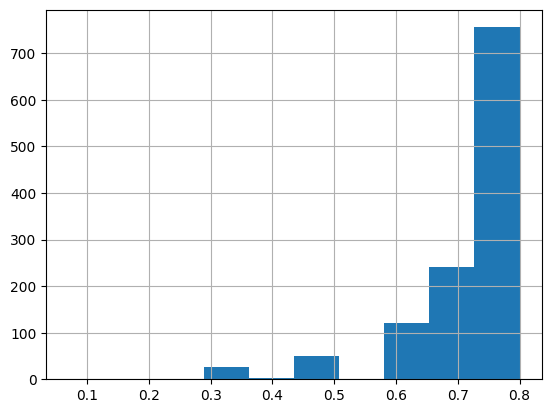

In [ ]:
df.targeted_productivity.hist()

<Axes: ylabel='targeted_productivity'>

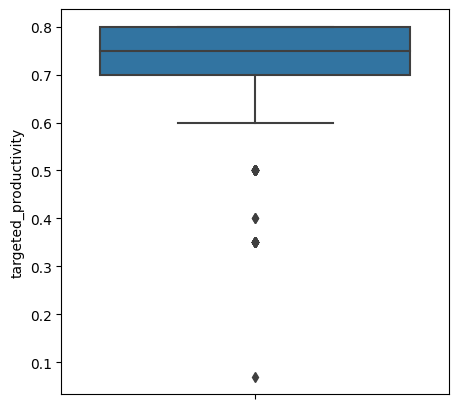

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df,y='targeted_productivity')

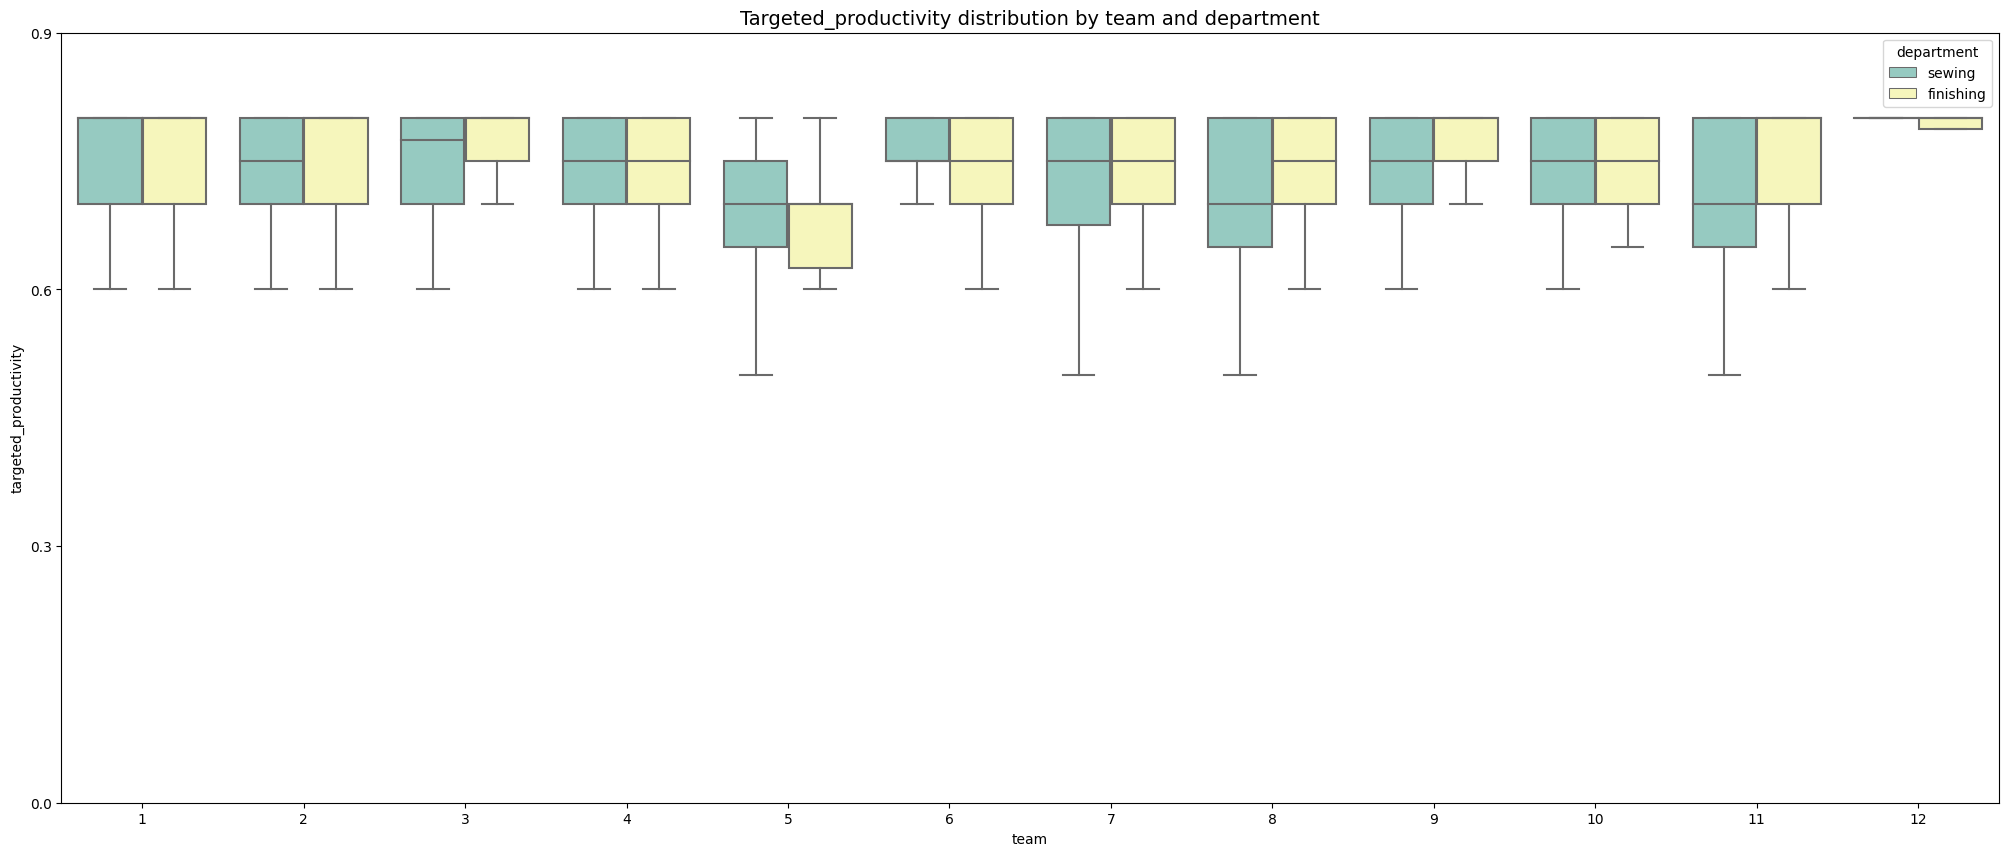

In [95]:
plt.figure(figsize=(25, 10))
palette = "Set3"

sns.boxplot(x = 'team', y = 'targeted_productivity', data = df,
     palette = palette,hue='department',fliersize = 0)
plt.yticks(np.arange(0,1.2,step=0.3))
plt.title('Targeted_productivity distribution by team and department',fontsize= 14)
plt.show()

# Actual vs Target

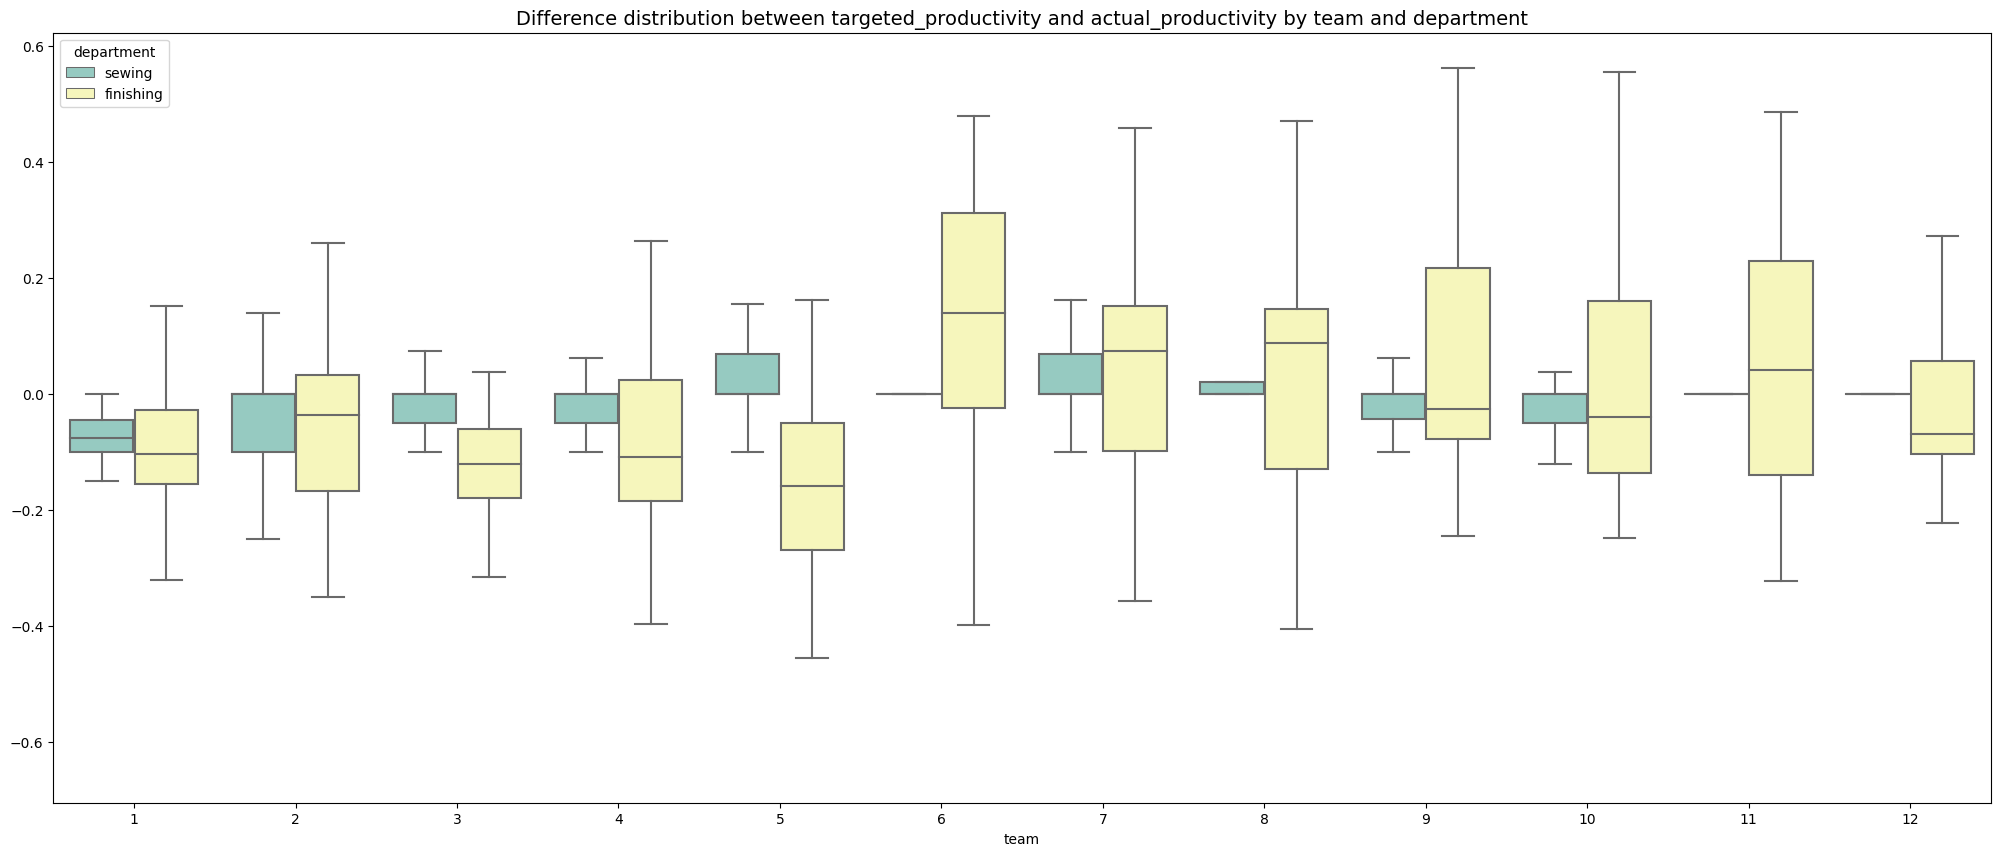

In [96]:
plt.figure(figsize=(25, 10))
palette = "Set3"

sns.boxplot(x = 'team', y = df.targeted_productivity-df.actual_productivity, data = df,
     palette = palette,hue='department',fliersize = 0)

plt.title('Difference distribution between targeted_productivity and actual_productivity by team and department',fontsize= 14)
plt.show()

In [99]:
df.skew().sort_values(ascending=True)

<ipython-input-99-8df2e83014aa>:1: FutureWarning:

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



targeted_productivity    -2.144150
actual_productivity      -0.807492
no_of_workers            -0.111740
team                      0.009848
smv                       0.405937
over_time                 0.673287
no_of_style_change        2.942506
wip                       9.741786
idle_men                  9.855079
incentive                15.790746
idle_time                20.545425
dtype: float64

In [97]:
from scipy.stats.mstats import normaltest
normaltest(df.actual_productivity.values)

NormaltestResult(statistic=107.39744323539699, pvalue=4.774649719927104e-24)

<Axes: >

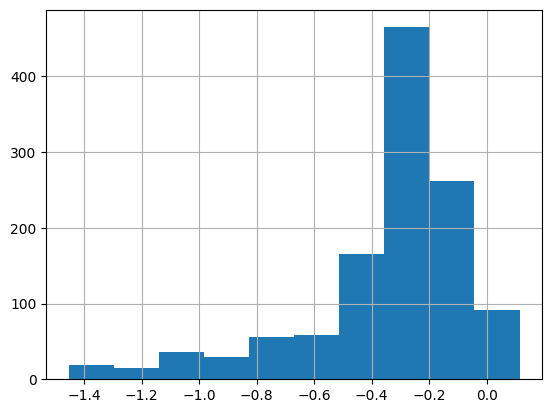

In [98]:
log_price = np.log(df.actual_productivity)
log_price.hist()

In [ ]:
normaltest(log_price)

NormaltestResult(statistic=340.7761891791675, pvalue=1.00320742479004e-74)

(array([ 97.,  76., 131., 171., 365., 132., 115.,  98.,   8.,   4.]),
 array([-0.46331654, -0.40417927, -0.34504199, -0.28590472, -0.22676745,
        -0.16763018, -0.10849291, -0.04935564,  0.00978163,  0.0689189 ,
         0.12805617]),
 <BarContainer object of 10 artists>)

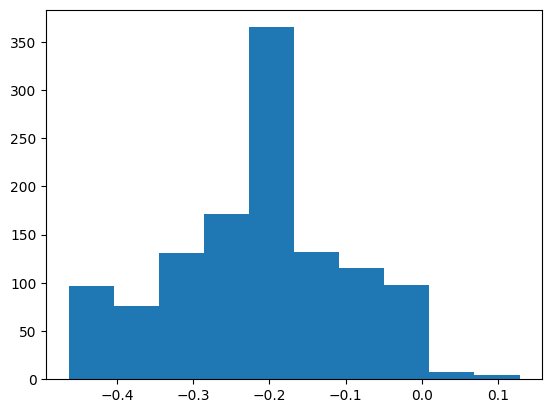

In [100]:
from scipy.stats import boxcox
bc_price= boxcox(df.actual_productivity)
boxcox_price = bc_price[0]
lambd = bc_price[1]
plt.hist(boxcox_price)  

In [101]:
normaltest(boxcox_price)

NormaltestResult(statistic=12.240154206943389, pvalue=0.0021982864609900953)

# Correlation Heatmap

<ipython-input-102-7d18f16fca9f>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

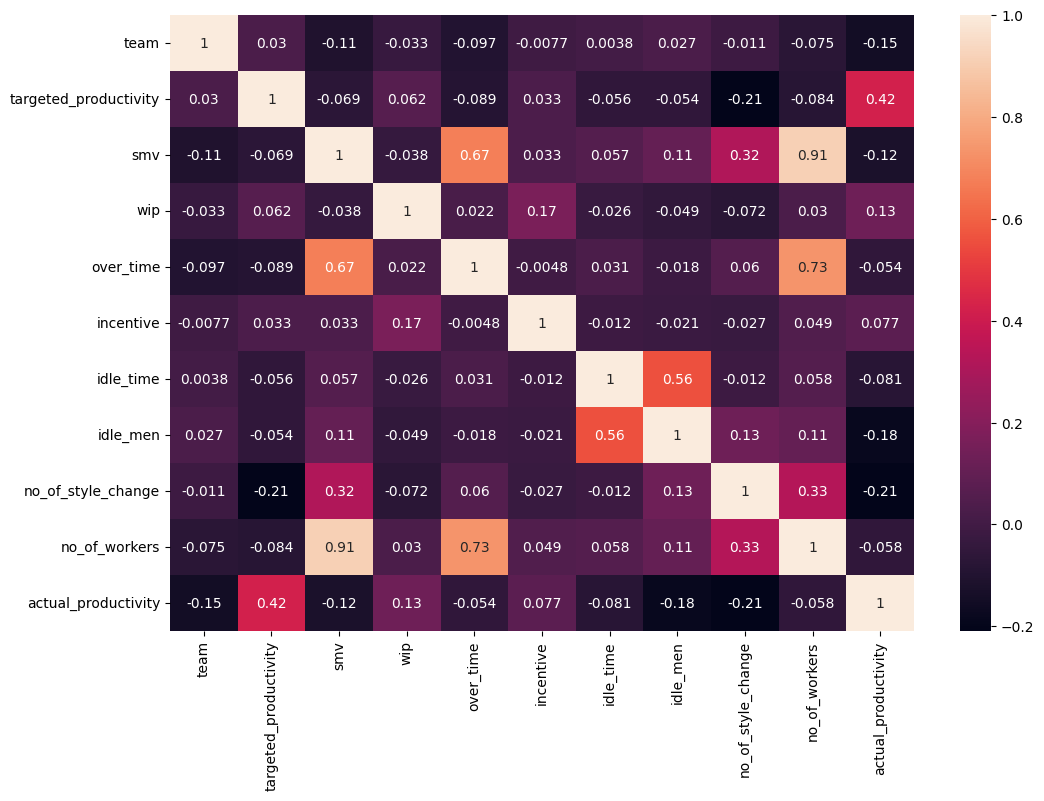

In [102]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

<ipython-input-35-3dbecef5f719>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

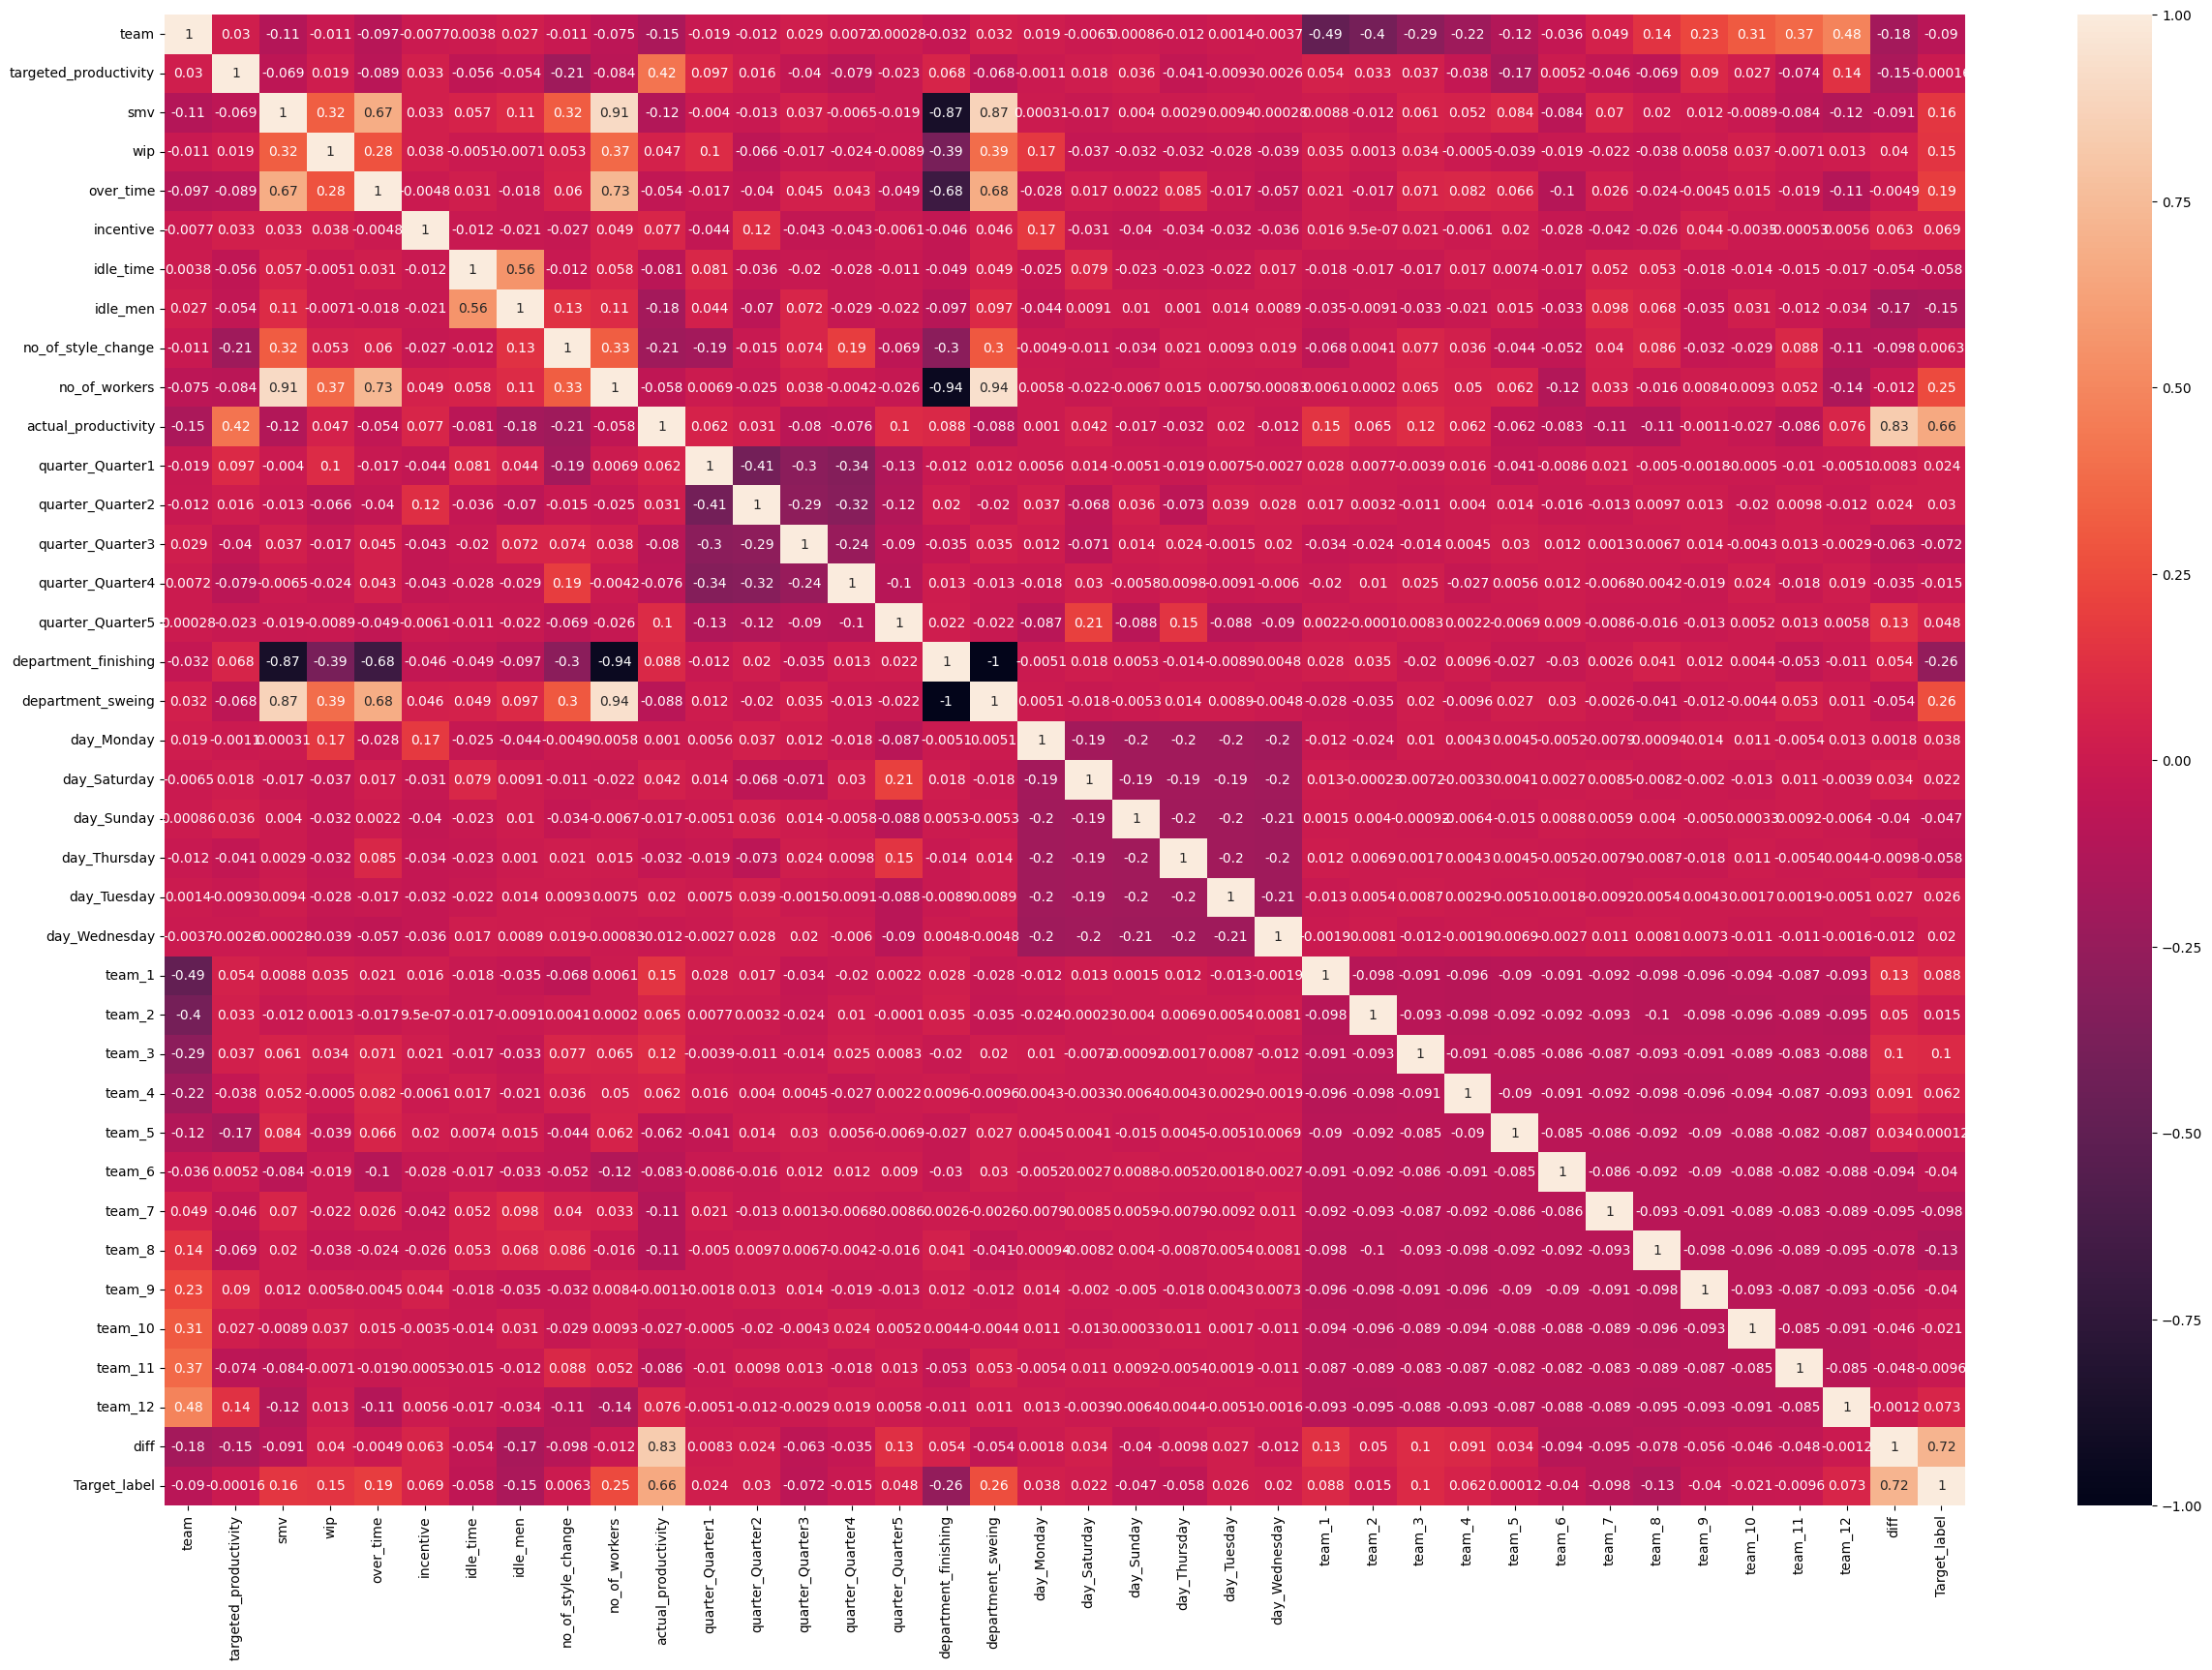

In [35]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)

<ipython-input-21-eb02dbfe9018>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


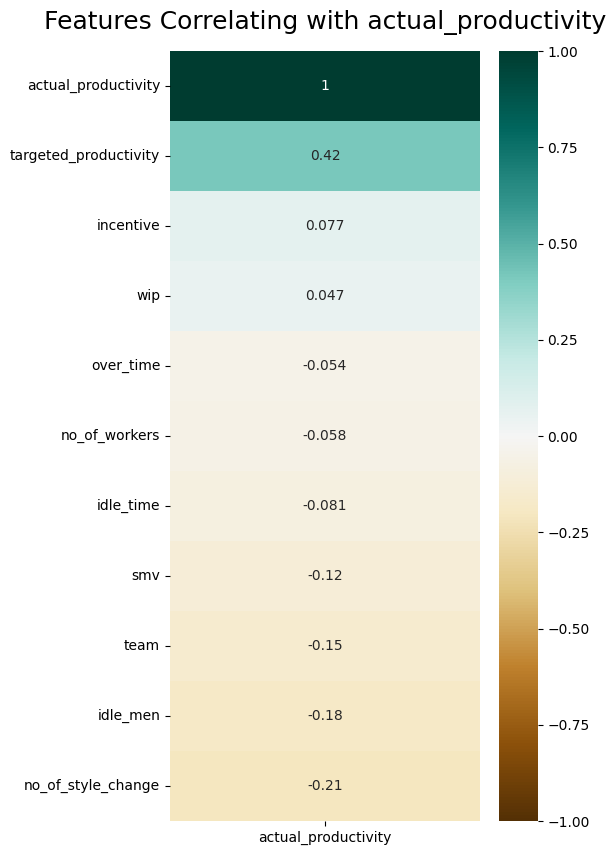

In [21]:
corrMatrix = df.corr()
plt.figure(figsize=(5, 10))
heatmap = sns.heatmap(corrMatrix[['actual_productivity']].sort_values(by='actual_productivity', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with actual_productivity', fontdict={'fontsize':18}, pad=16);

<ipython-input-36-eb02dbfe9018>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


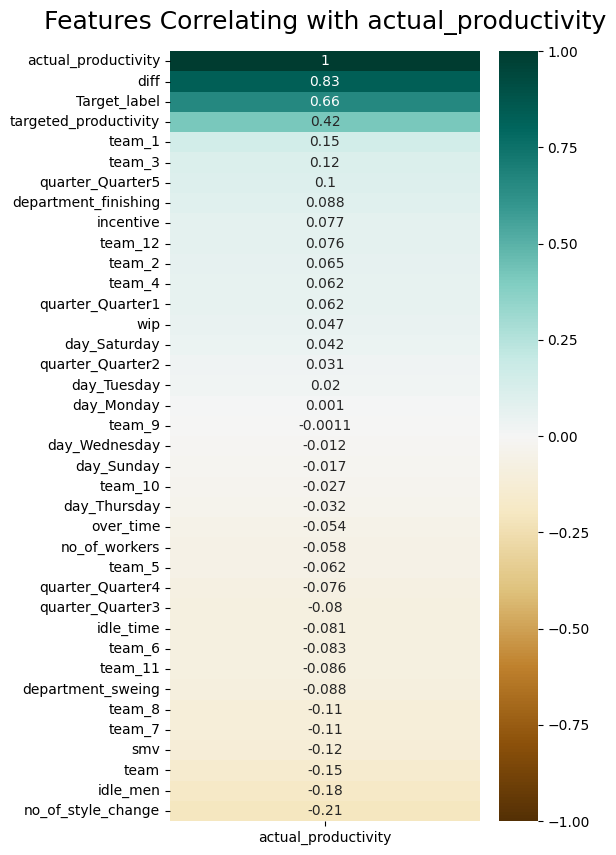

In [36]:
corrMatrix = df.corr()
plt.figure(figsize=(5, 10))
heatmap = sns.heatmap(corrMatrix[['actual_productivity']].sort_values(by='actual_productivity', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with actual_productivity', fontdict={'fontsize':18}, pad=16);

# One Hot Encoding

In [22]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

df = create_dummies(df,"quarter")
df = create_dummies(df,"department")
df = create_dummies(df,"day")
df = create_dummies(df,"team")

df.columns

Index(['quarter', 'department', 'day', 'date', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12'],
      dtype='object')

# Creating Target Label


In [30]:
df.columns

Index(['quarter', 'department', 'day', 'date', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12'],
      dtype='object')

In [34]:
df['diff']=df.actual_productivity-df.targeted_productivity
print(df.columns)
df['diff'].describe()

Index(['quarter', 'department', 'day', 'date', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12', 'diff', 'Target_label'],
      dtype='object')


count    1197.000000
mean        0.005459
std         0.160082
min        -0.561958
25%        -0.009556
50%         0.000505
75%         0.099111
max         0.644375
Name: diff, dtype: float64

In [32]:
df['Target_label']=np.nan
df.head()
df.loc[df['diff']<0,'Target_label'] = -1
df.loc[(df['diff']==0), 'Target_label'] = 0
df.loc[df['diff']>0, 'Target_label'] = 1
df.head()

quarter department       day       date  team  targeted_productivity  \
0  Quarter1     sweing  Thursday 2015-01-01     8                   0.80   
1  Quarter1  finishing  Thursday 2015-01-01     1                   0.75   
2  Quarter1     sweing  Thursday 2015-01-01    11                   0.80   
3  Quarter1     sweing  Thursday 2015-01-01    12                   0.80   
4  Quarter1     sweing  Thursday 2015-01-01     6                   0.80   

     smv     wip  over_time  incentive  ...  team_5  team_6  team_7  team_8  \
0  26.16  1108.0       7080         98  ...       0       0       0       1   
1   3.94     0.0        960          0  ...       0       0       0       0   
2  11.41   968.0       3660         50  ...       0       0       0       0   
3  11.41   968.0       3660         50  ...       0       0       0       0   
4  25.90  1170.0       1920         50  ...       0       1       0       0   

   team_9  team_10  team_11  team_12      diff  Target_label  
0       0        0        0        0  0.140725           1.0  
1       0        0        0        0  0.136500           1.0  
2       0        0        1        0  0.000570           1.0  
3       0        0        0        1  0.000570           1.0  
4       0        0        0        0  0.000382           1.0  

[5 rows x 42 columns]

In [ ]:
df[df['Target_label']==0]

quarter department       day       date  team  targeted_productivity  \
163  Quarter2     sweing  Saturday 2015-01-10    10                    0.8   
182  Quarter2     sweing    Sunday 2015-01-11     2                    0.8   
183  Quarter2     sweing    Sunday 2015-01-11    10                    0.8   
207  Quarter2     sweing    Monday 2015-01-12     2                    0.8   
229  Quarter2     sweing   Tuesday 2015-01-13     2                    0.8   
855  Quarter3     sweing  Thursday 2015-02-19     8                    0.7   

       smv     wip  over_time  incentive  ...  team_6  team_7  team_8  team_9  \
163  28.08  1082.0      10530         63  ...       0       0       0       0   
182  28.08   805.0      10530         63  ...       0       0       0       0   
183  28.08   762.0      10530         38  ...       0       0       0       0   
207  28.08   737.0      10530         63  ...       0       0       0       0   
229  28.08   723.0      10530         50  ...       0       0       0       0   
855  29.40  1116.0       6240          0  ...       0       0       1       0   

     team_10  team_11  team_12  no_of_style_change_enc  diff  Target_label  
163        1        0        0                       0   0.0           0.0  
182        0        0        0                       0   0.0           0.0  
183        1        0        0                       0   0.0           0.0  
207        0        0        0                       0   0.0           0.0  
229        0        0        0                       0   0.0           0.0  
855        0        0        0                       2   0.0           0.0  

[6 rows x 43 columns]

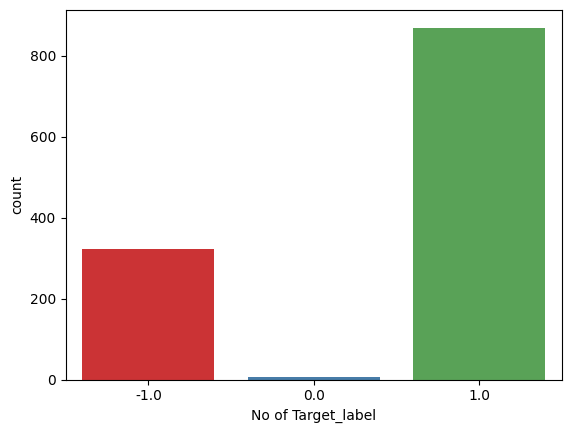

In [ ]:
ax = sns.countplot(x = 'Target_label', data = df, palette='Set1')
plt.xlabel('No of Target_label')

plt.show()

In [ ]:
df['Target_label'].value_counts()

 1.0    869
-1.0    322
 0.0      6
Name: Target_label, dtype: int64

In [33]:
df['Target_label'] = [0 if x==-1 else 1 for x in df['Target_label']]

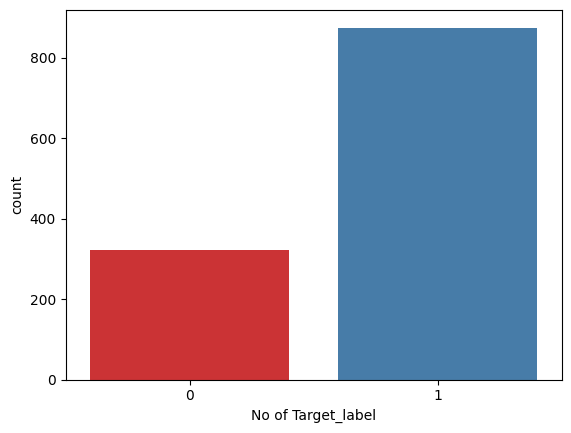

In [ ]:
ax = sns.countplot(x = 'Target_label', data = df, palette='Set1')
plt.xlabel('No of Target_label')

plt.show()

# PCA

In [ ]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

columns = ['smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_workers',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12', 'no_of_style_change']

X = df[columns]
y = df['actual_productivity']

pca = PCA(n_components = 2)
pca.fit(X)
X_pca = pca.transform(X)
 
explained_variance = pca.explained_variance_ratio_

print(f"Variance explained: {round(sum(pca.explained_variance_ratio_)*100, 2)}%")

Variance explained: 99.81%


In [ ]:
import plotly.express as px

X_pca_df = pd.DataFrame(X_pca, columns=['pca_1', 'pca_2'])

target_col = 'actual_productivity'
data_temp = pd.concat([X_pca_df, df[[target_col]]], axis=1)
fig = px.scatter_3d(data_temp, x='pca_1', y='pca_2', z=target_col, color=target_col, opacity=0.7, size_max=2)
fig.show()

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

columns = ['smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_workers',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12', 'no_of_style_change']

X = df[columns]
y = df['Target_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,random_state=0)

In [ ]:
# PCA Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_pca_df, y, test_size=0.2,random_state=0)

# Scaling/Normalizing

In [ ]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build Models

In [ ]:
import math
df_perf_metrics = pd.DataFrame(columns=[
    'Model', 'Accuracy_Training_Set', 'Accuracy_Test_Set', 'Precision',
    'Recall', 'f1_score', 'MAE', 'MSE', 'RMSE'
])
models_trained_list = []


def get_perf_metrics(model, i):
    # model name
    model_name = type(model).__name__
    print("Training {} model...".format(model_name))
    # Fitting of model
    model.fit(X_train, y_train)
    print("Completed {} model training.".format(model_name))
    # Predictions
    y_pred = model.predict(X_test)
    

    #define metrics
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    mae=metrics.mean_absolute_error(y_test, y_pred_proba)
    mse=metrics.mean_squared_error(y_test, y_pred_proba)
    rmse=math.sqrt(metrics.mean_squared_error(y_test, y_pred_proba))
    cm = confusion_matrix(y_test, y_pred)

    # create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()

    # Add to ith row of dataframe - metrics
    df_perf_metrics.loc[i] = [
        model_name,
        model.score(X_train, y_train),
        model.score(X_test, y_test),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        mae,
        mse,
        rmse
    ]
   # pos_label='positive', average='micro'
    print("Completed {} model's performance assessment.".format(model_name))

In [ ]:
models_list = [LogisticRegression(),
               RandomForestClassifier(),
               SVC(probability=True),
               GaussianNB()
               ]

Training LogisticRegression model...
Completed LogisticRegression model training.


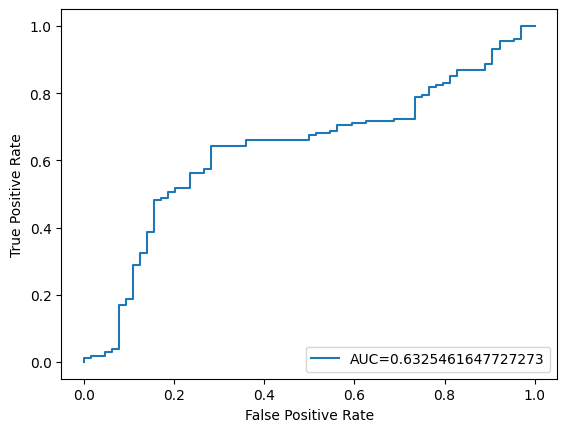

Completed LogisticRegression model's performance assessment.
Training RandomForestClassifier model...
Completed RandomForestClassifier model training.


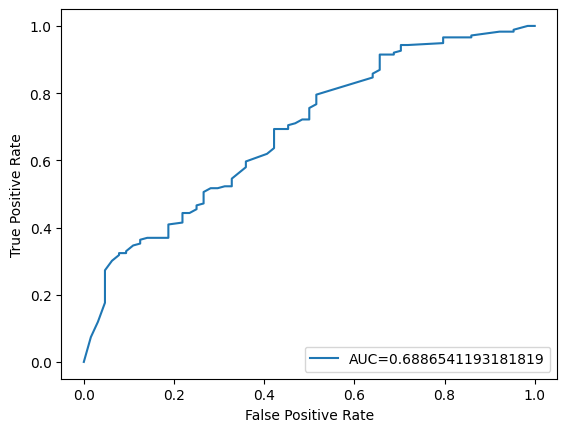

Completed RandomForestClassifier model's performance assessment.
Training SVC model...
Completed SVC model training.


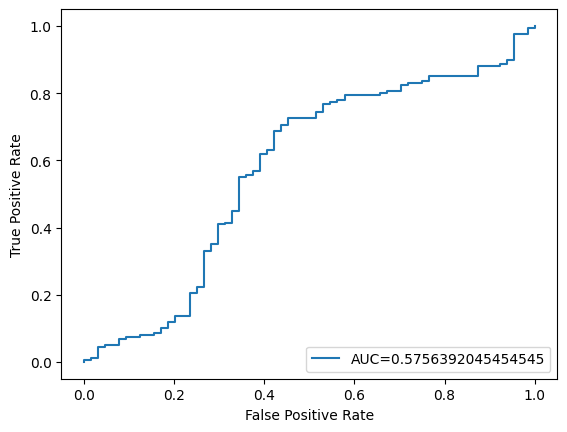

Completed SVC model's performance assessment.
Training GaussianNB model...
Completed GaussianNB model training.


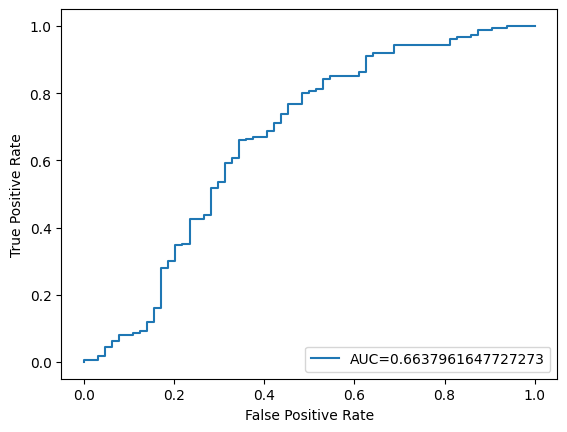

Completed GaussianNB model's performance assessment.


In [ ]:
from sklearn.metrics import r2_score,f1_score
for n, model in enumerate(models_list):
    get_perf_metrics(model, n)

In [ ]:
df_perf_metrics

Model  Accuracy_Training_Set  Accuracy_Test_Set  \
0      LogisticRegression               0.730408           0.733333   
1  RandomForestClassifier               0.916405           0.729167   
2                     SVC               0.731452           0.733333   
3              GaussianNB               0.609195           0.554167   

   Precision    Recall  f1_score       MAE       MSE      RMSE  
0   0.733333  1.000000  0.846154  0.631380  0.799542  0.894171  
1   0.784615  0.869318  0.824798  0.594995  0.761334  0.872545  
2   0.733333  1.000000  0.846154  0.659082  0.851927  0.922999  
3   0.828571  0.494318  0.619217  0.734845  0.767685  0.876177